# Chapter 3 - Fixed Income Modeling #

## Code segment 3.1  
Figure 3.1 in preamble to Chapter 3

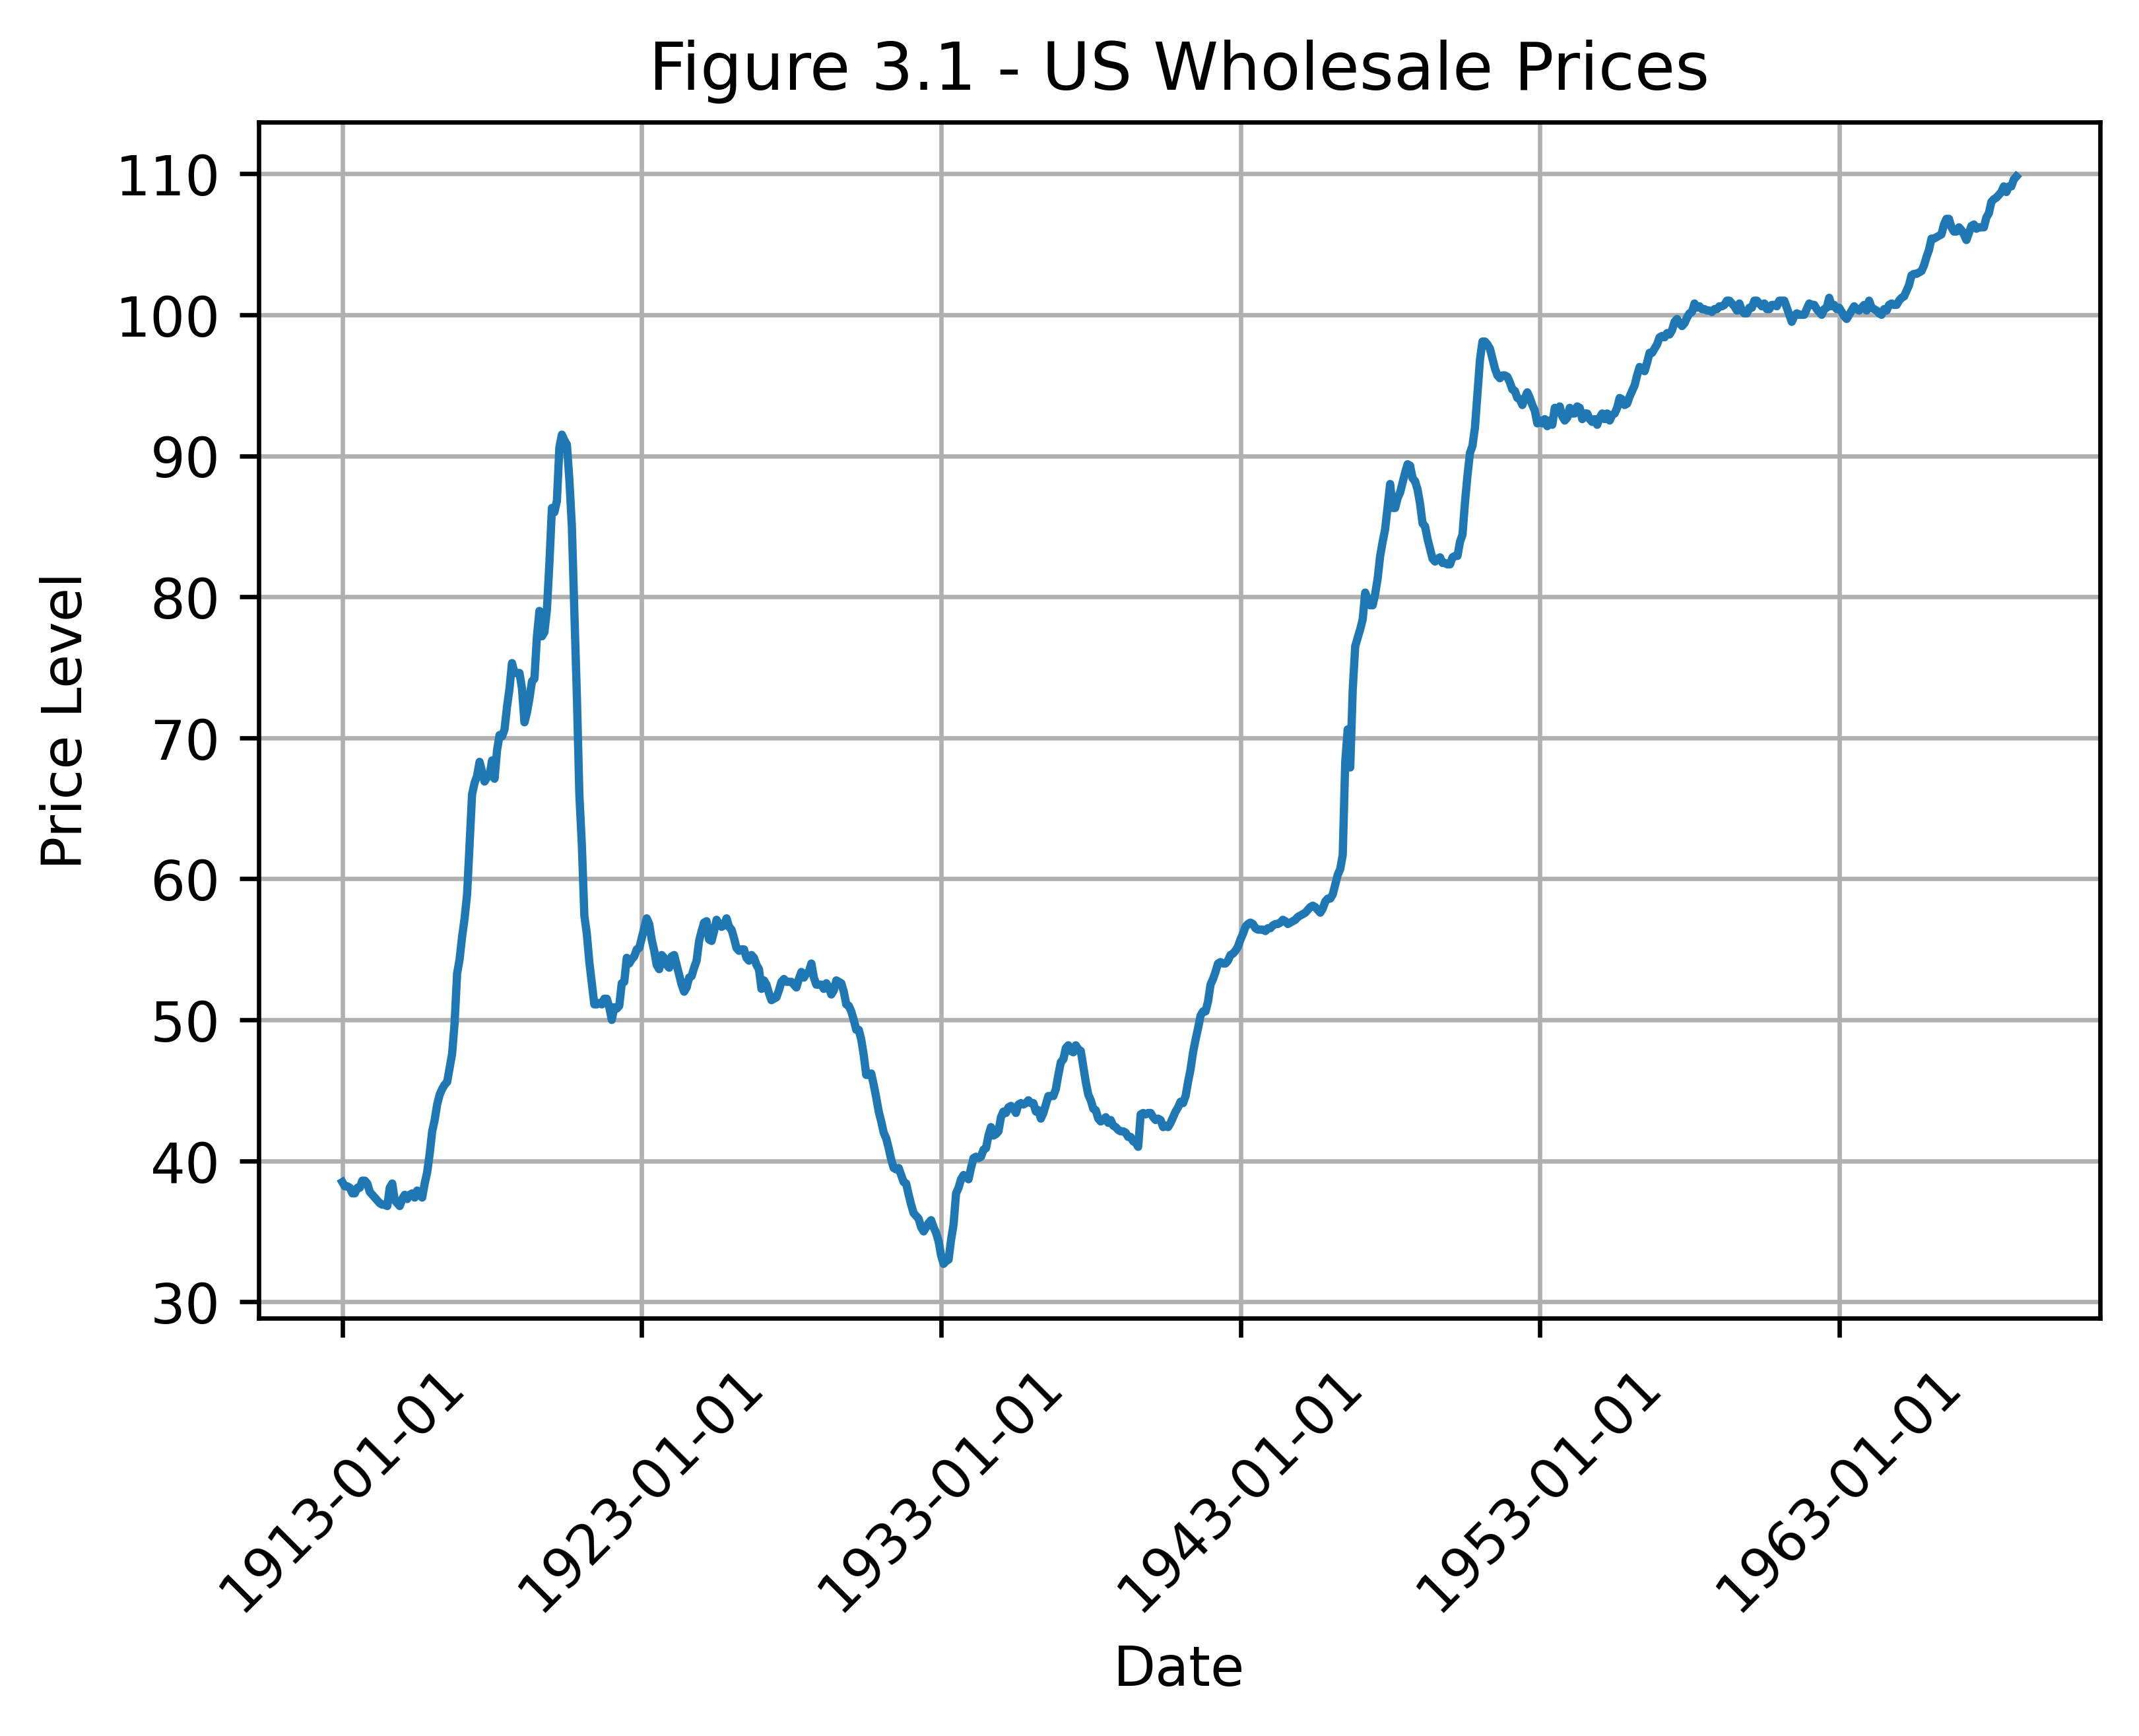

In [2]:
#Code Segment 3.1
import qrpm_funcs as qf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 300

#FRED code for wholesale price series 1914-1968
seriesnames=['M0448CUSM350NNBR']

dates,prices=qf.GetFREDMatrix(seriesnames)

## Configure the graph
x=np.arange(len(dates))
plt.plot(x,prices)
plt.title('Figure 3.1 - US Wholesale Prices')
plt.xlabel('Date')
plt.ylabel('Price Level')
plt.xticks(x[::120],dates[::120],rotation=45)
plt.grid(True)
plt.show();

## Code segment 3.2  
Figure 3.2 in Section 3.1

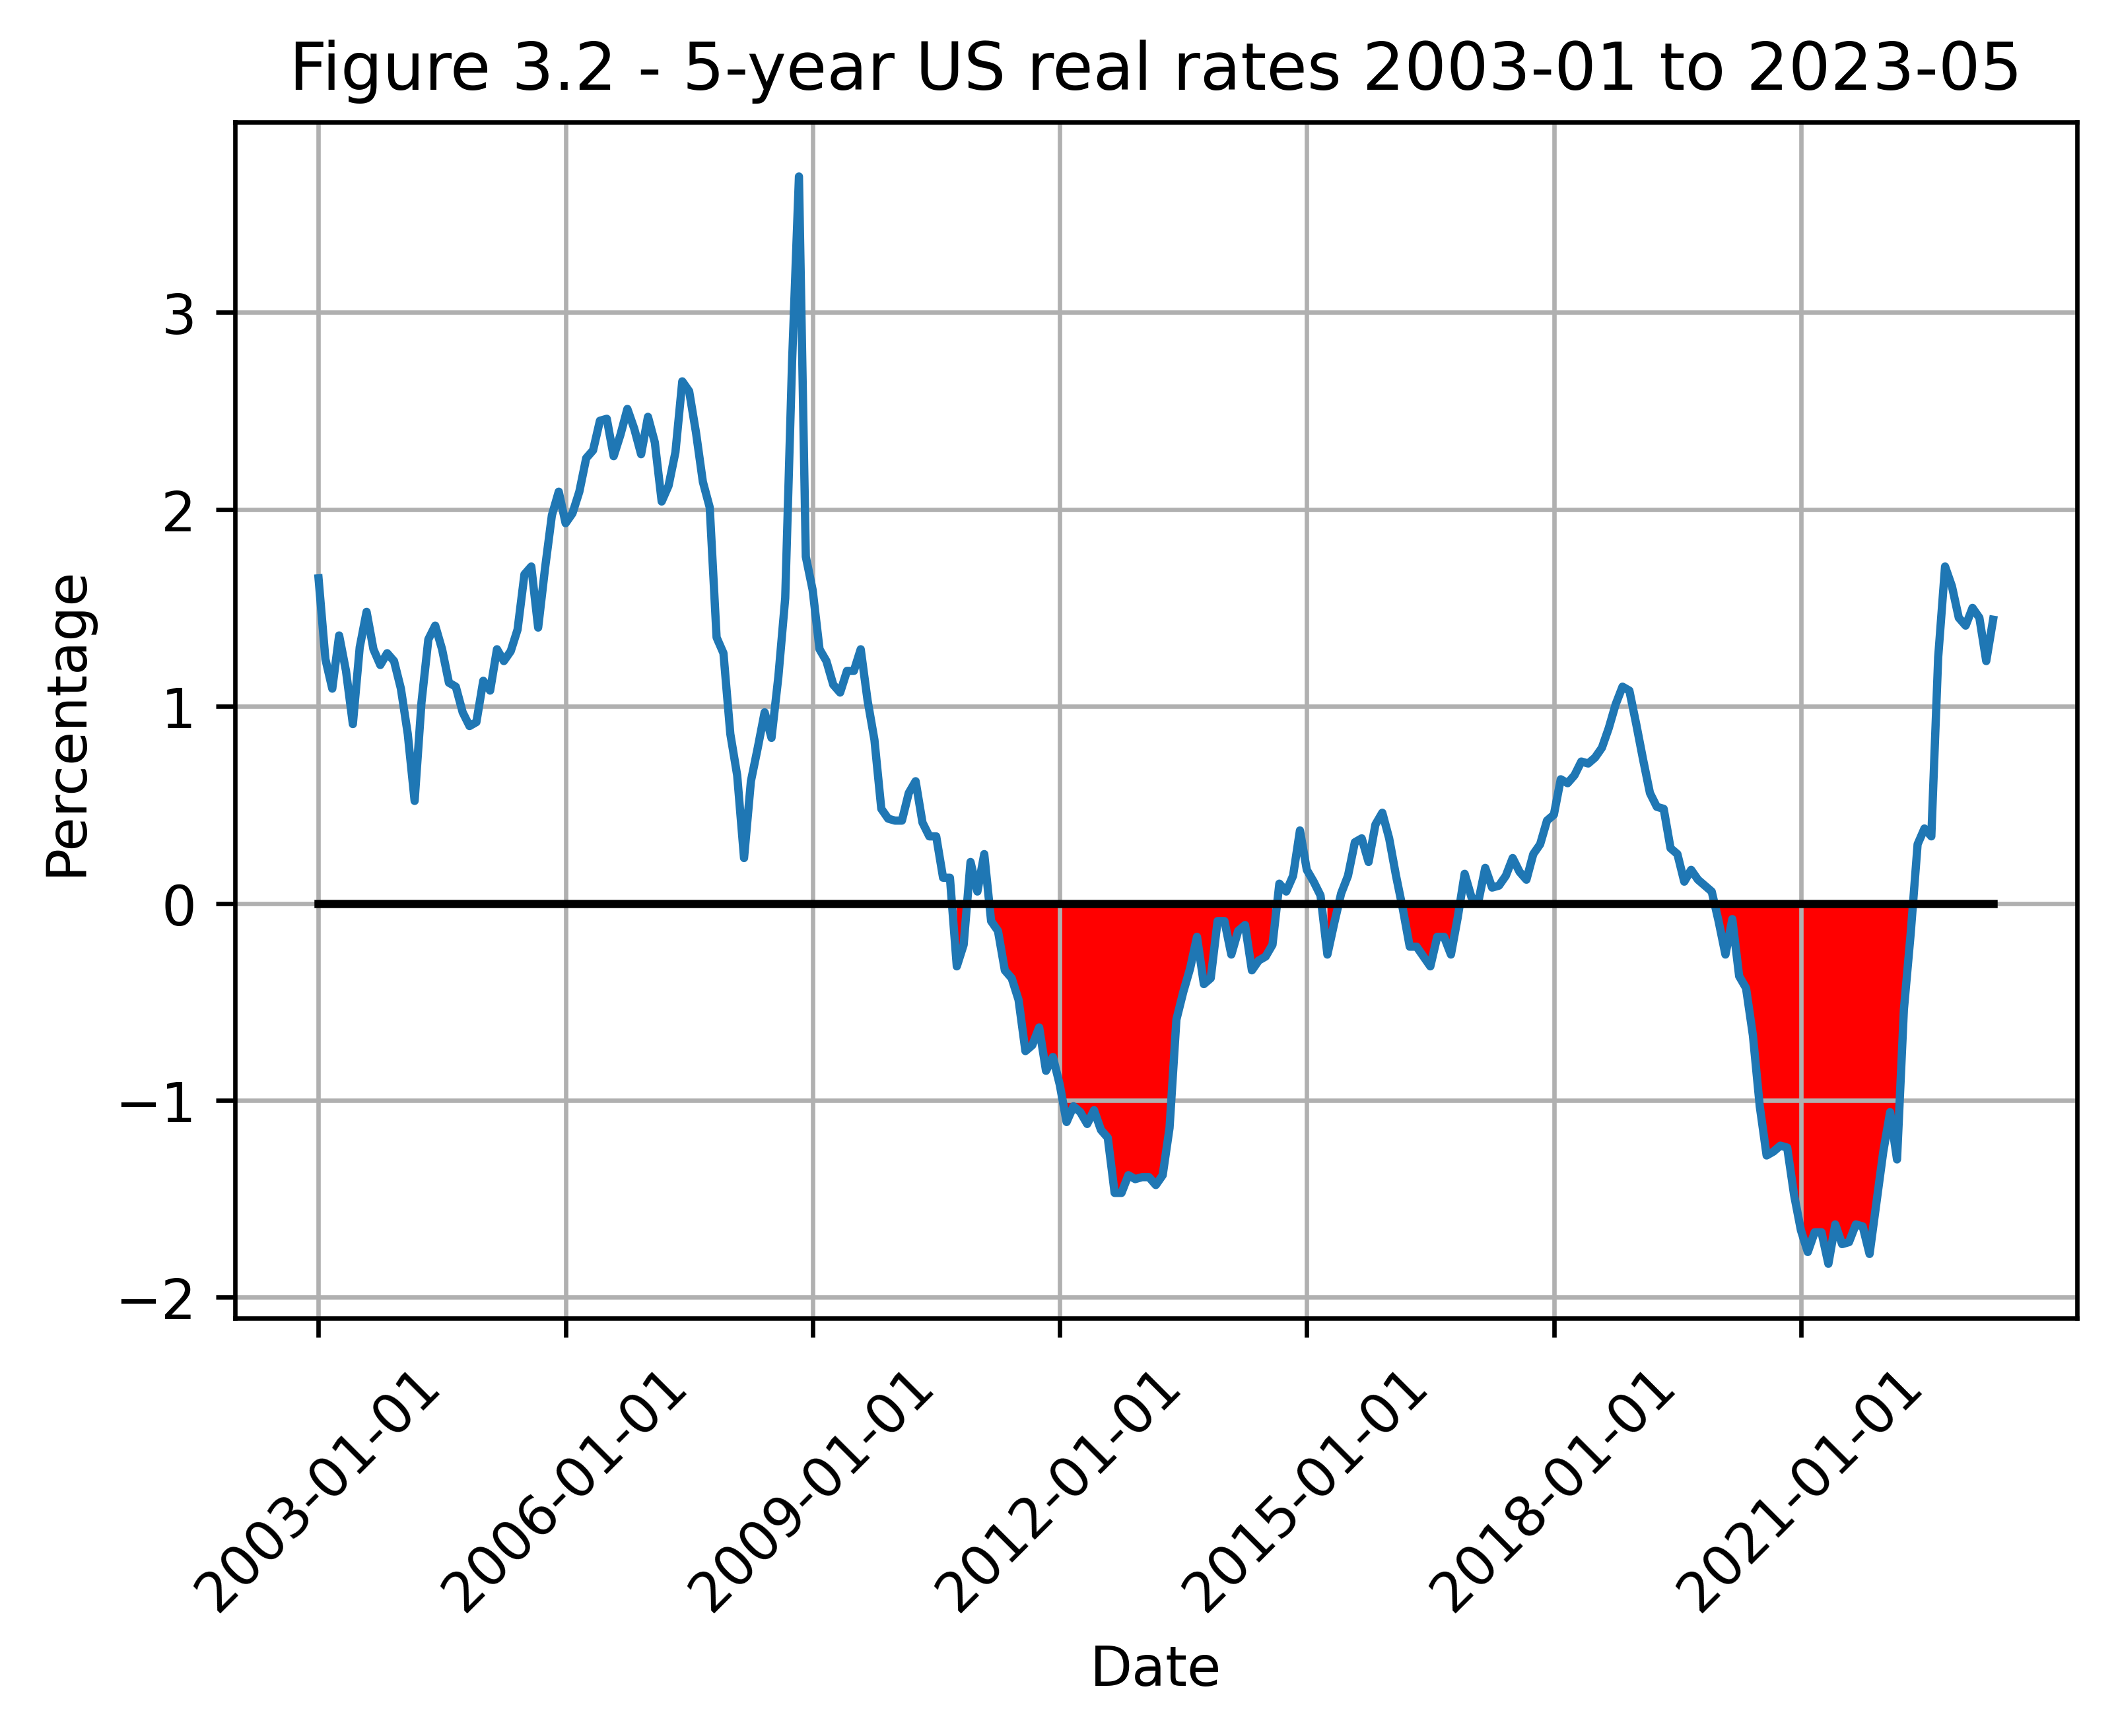

In [3]:
#Code Segment 3.2
#FRED code for 5-year TIPS returns
seriesnames=['FII5']

dates,prices=qf.GetFREDMatrix(seriesnames)

#reformatting needed for fill_between
#prices is actually an array of singleton arrays,
#which fill_between doesn't like
p=[prices[i][0] for i in range(len(prices))]
    
## Configure the graph
x=np.arange(len(dates))
zeroline=np.zeros(len(dates))
plt.plot(x,p)
plt.plot(x,zeroline,color='black')
plt.fill_between(x,p,zeroline,where=zeroline >= p,facecolor='red')
str_title='Figure 3.2 - 5-year US real rates '
str_title+=dates[0][:7]+' to '+dates[-1][:7]
plt.title(str_title)
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(x[::36],dates[::36],rotation=45)
plt.grid(True)
plt.show();

## Code segment 3.3  
Figure 3.3 in Section 3.1

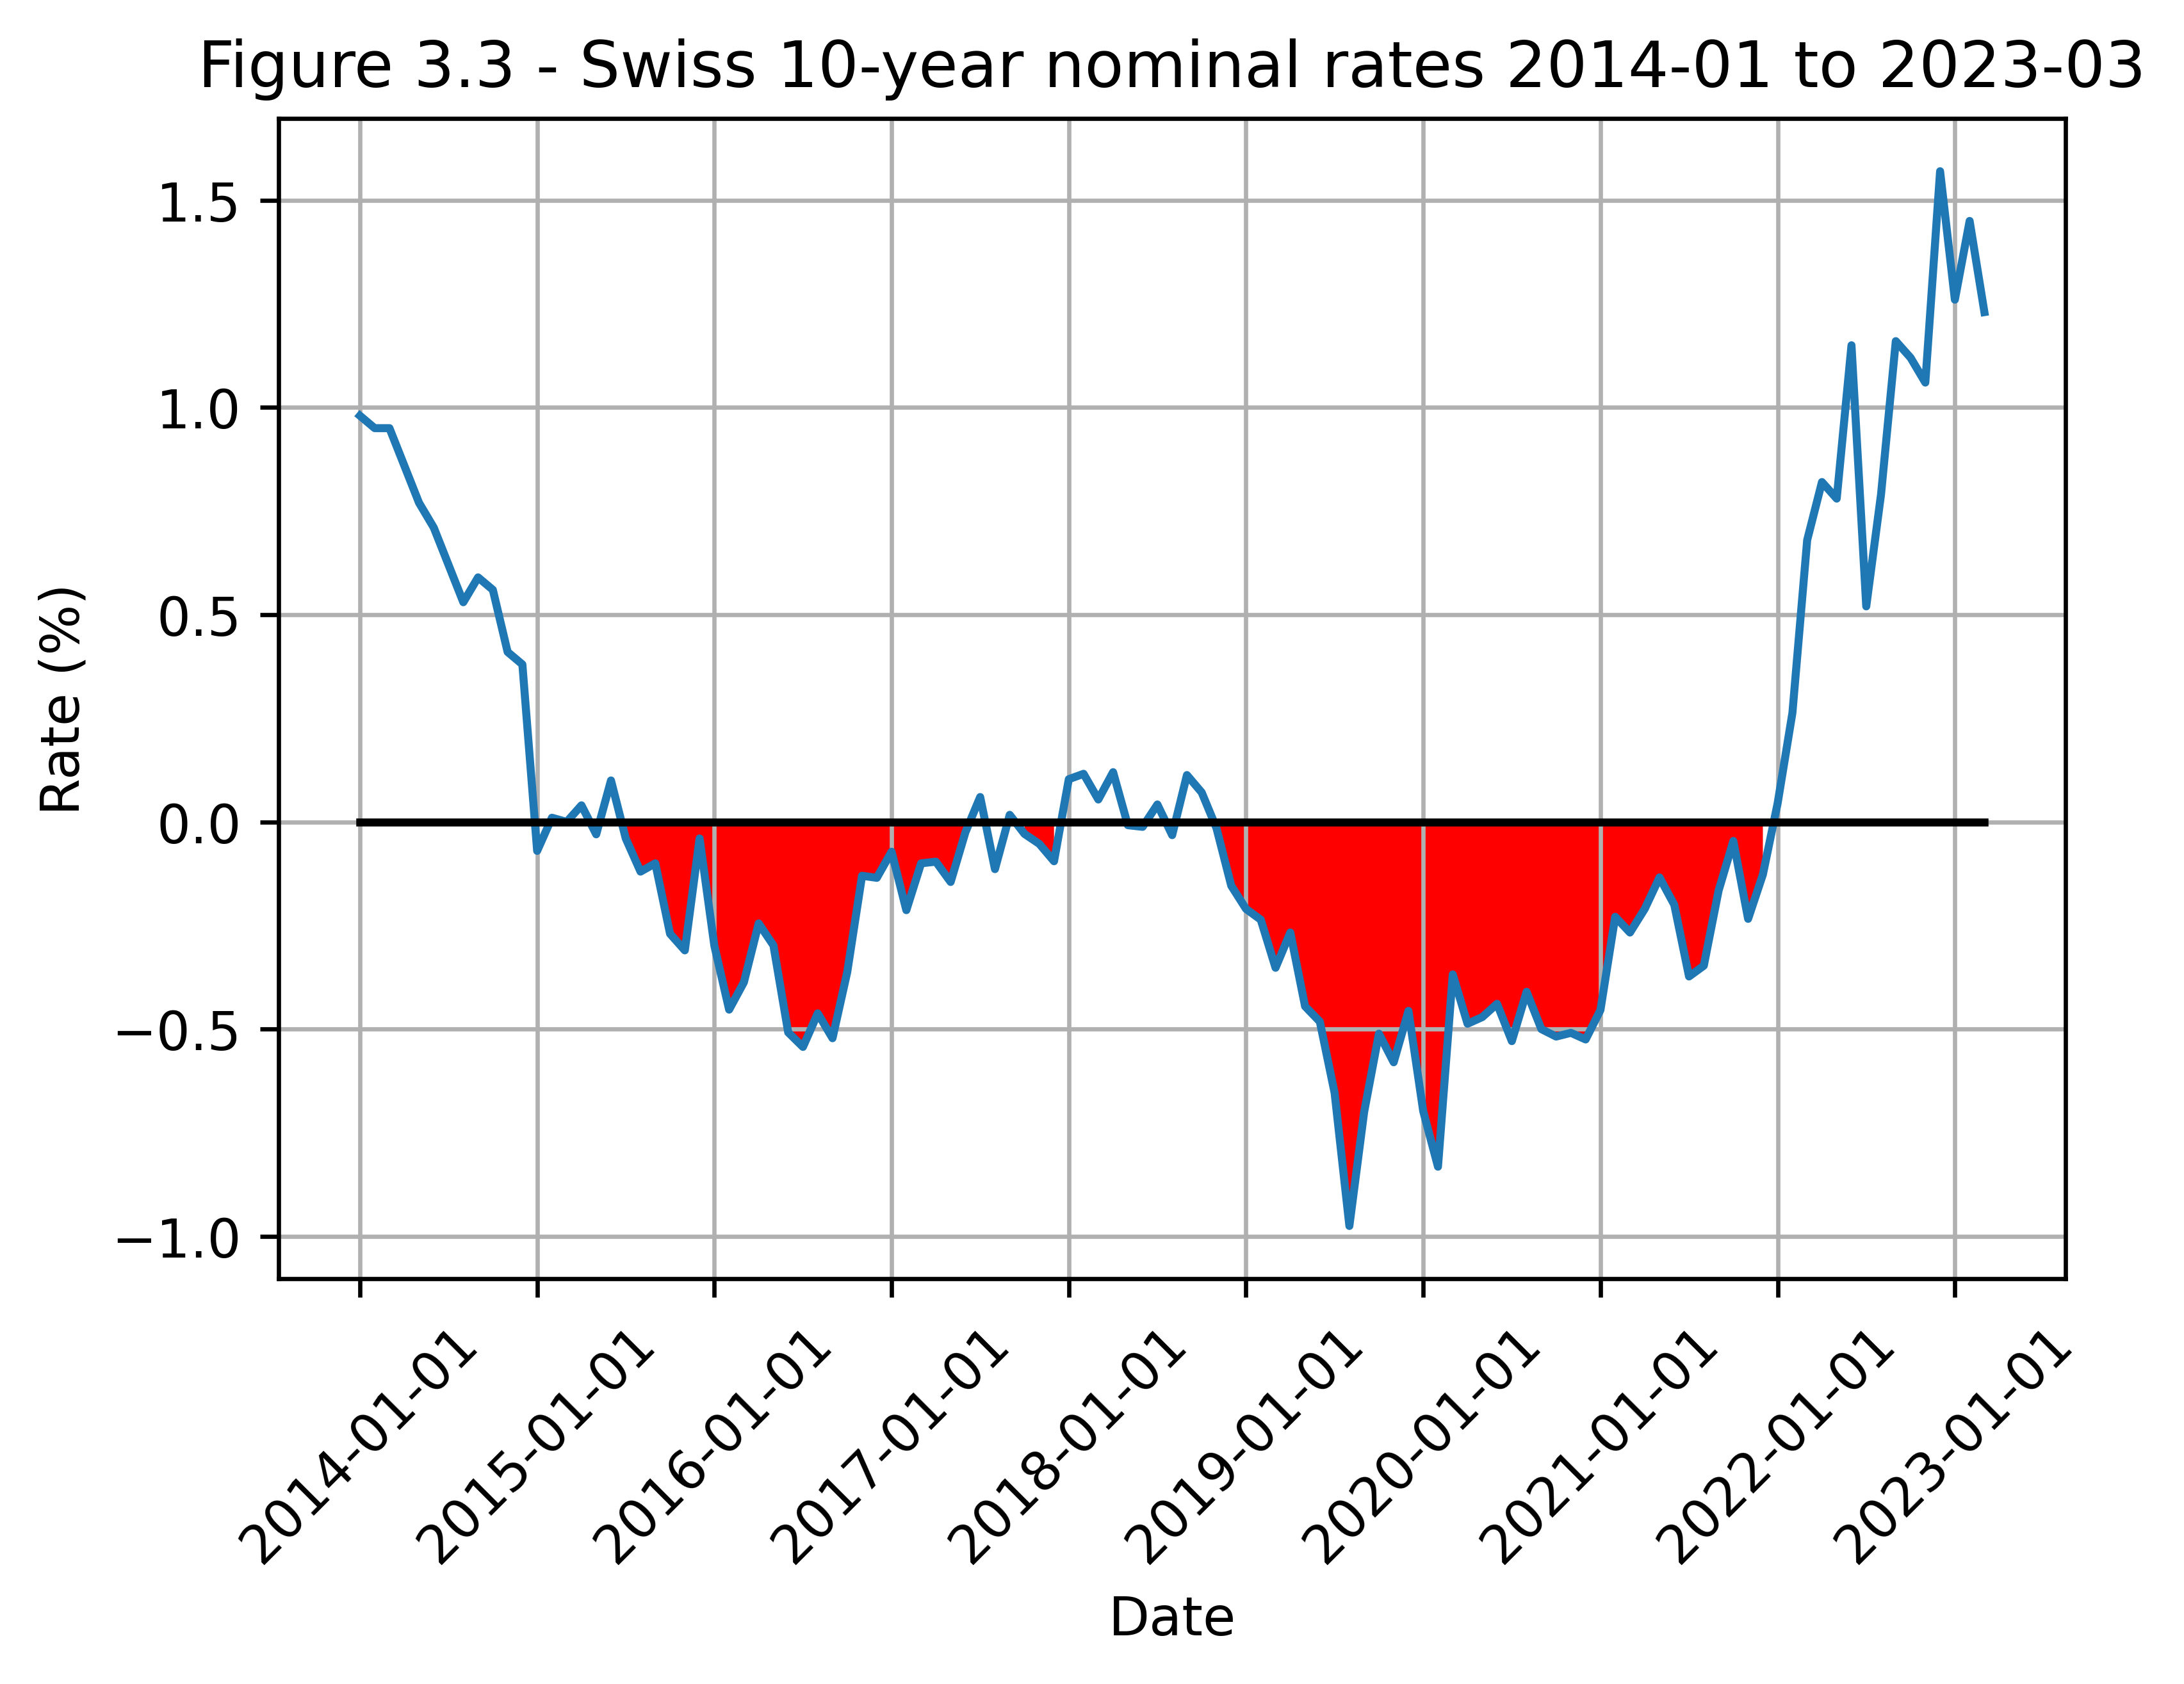

In [4]:
#Code Segment 3.3
#FRED code for Swiss 10-year rates
seriesnames=['IRLTLT01CHM156N']

dates,rates=qf.GetFREDMatrix(seriesnames,startdate='2014-01-02')

#reformatting needed for fill_between
#prices is actually an array of singleton arrays,
#which fill_between doesn't like
r=[rates[i][0] for i in range(len(rates))]

## Configure the graph
x=np.arange(len(dates))
plt.plot(x,r)
#Put in a horizontal line at 0 and shade negative rates in red
zeroline=np.zeros(len(dates))
plt.plot(x,zeroline,color='black')
plt.fill_between(x,r,zeroline,where=zeroline >= r,facecolor='red')
#titles and labels
str_title='Figure 3.3 - Swiss 10-year nominal rates '
str_title+=dates[0][:7]+' to '+dates[-1][:7]
plt.title(str_title)
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.xticks(x[::12],dates[::12],rotation=45)
plt.grid(True)
plt.show();

## Code segment 3.4  
Figure 3.4 in Section 3.4.1

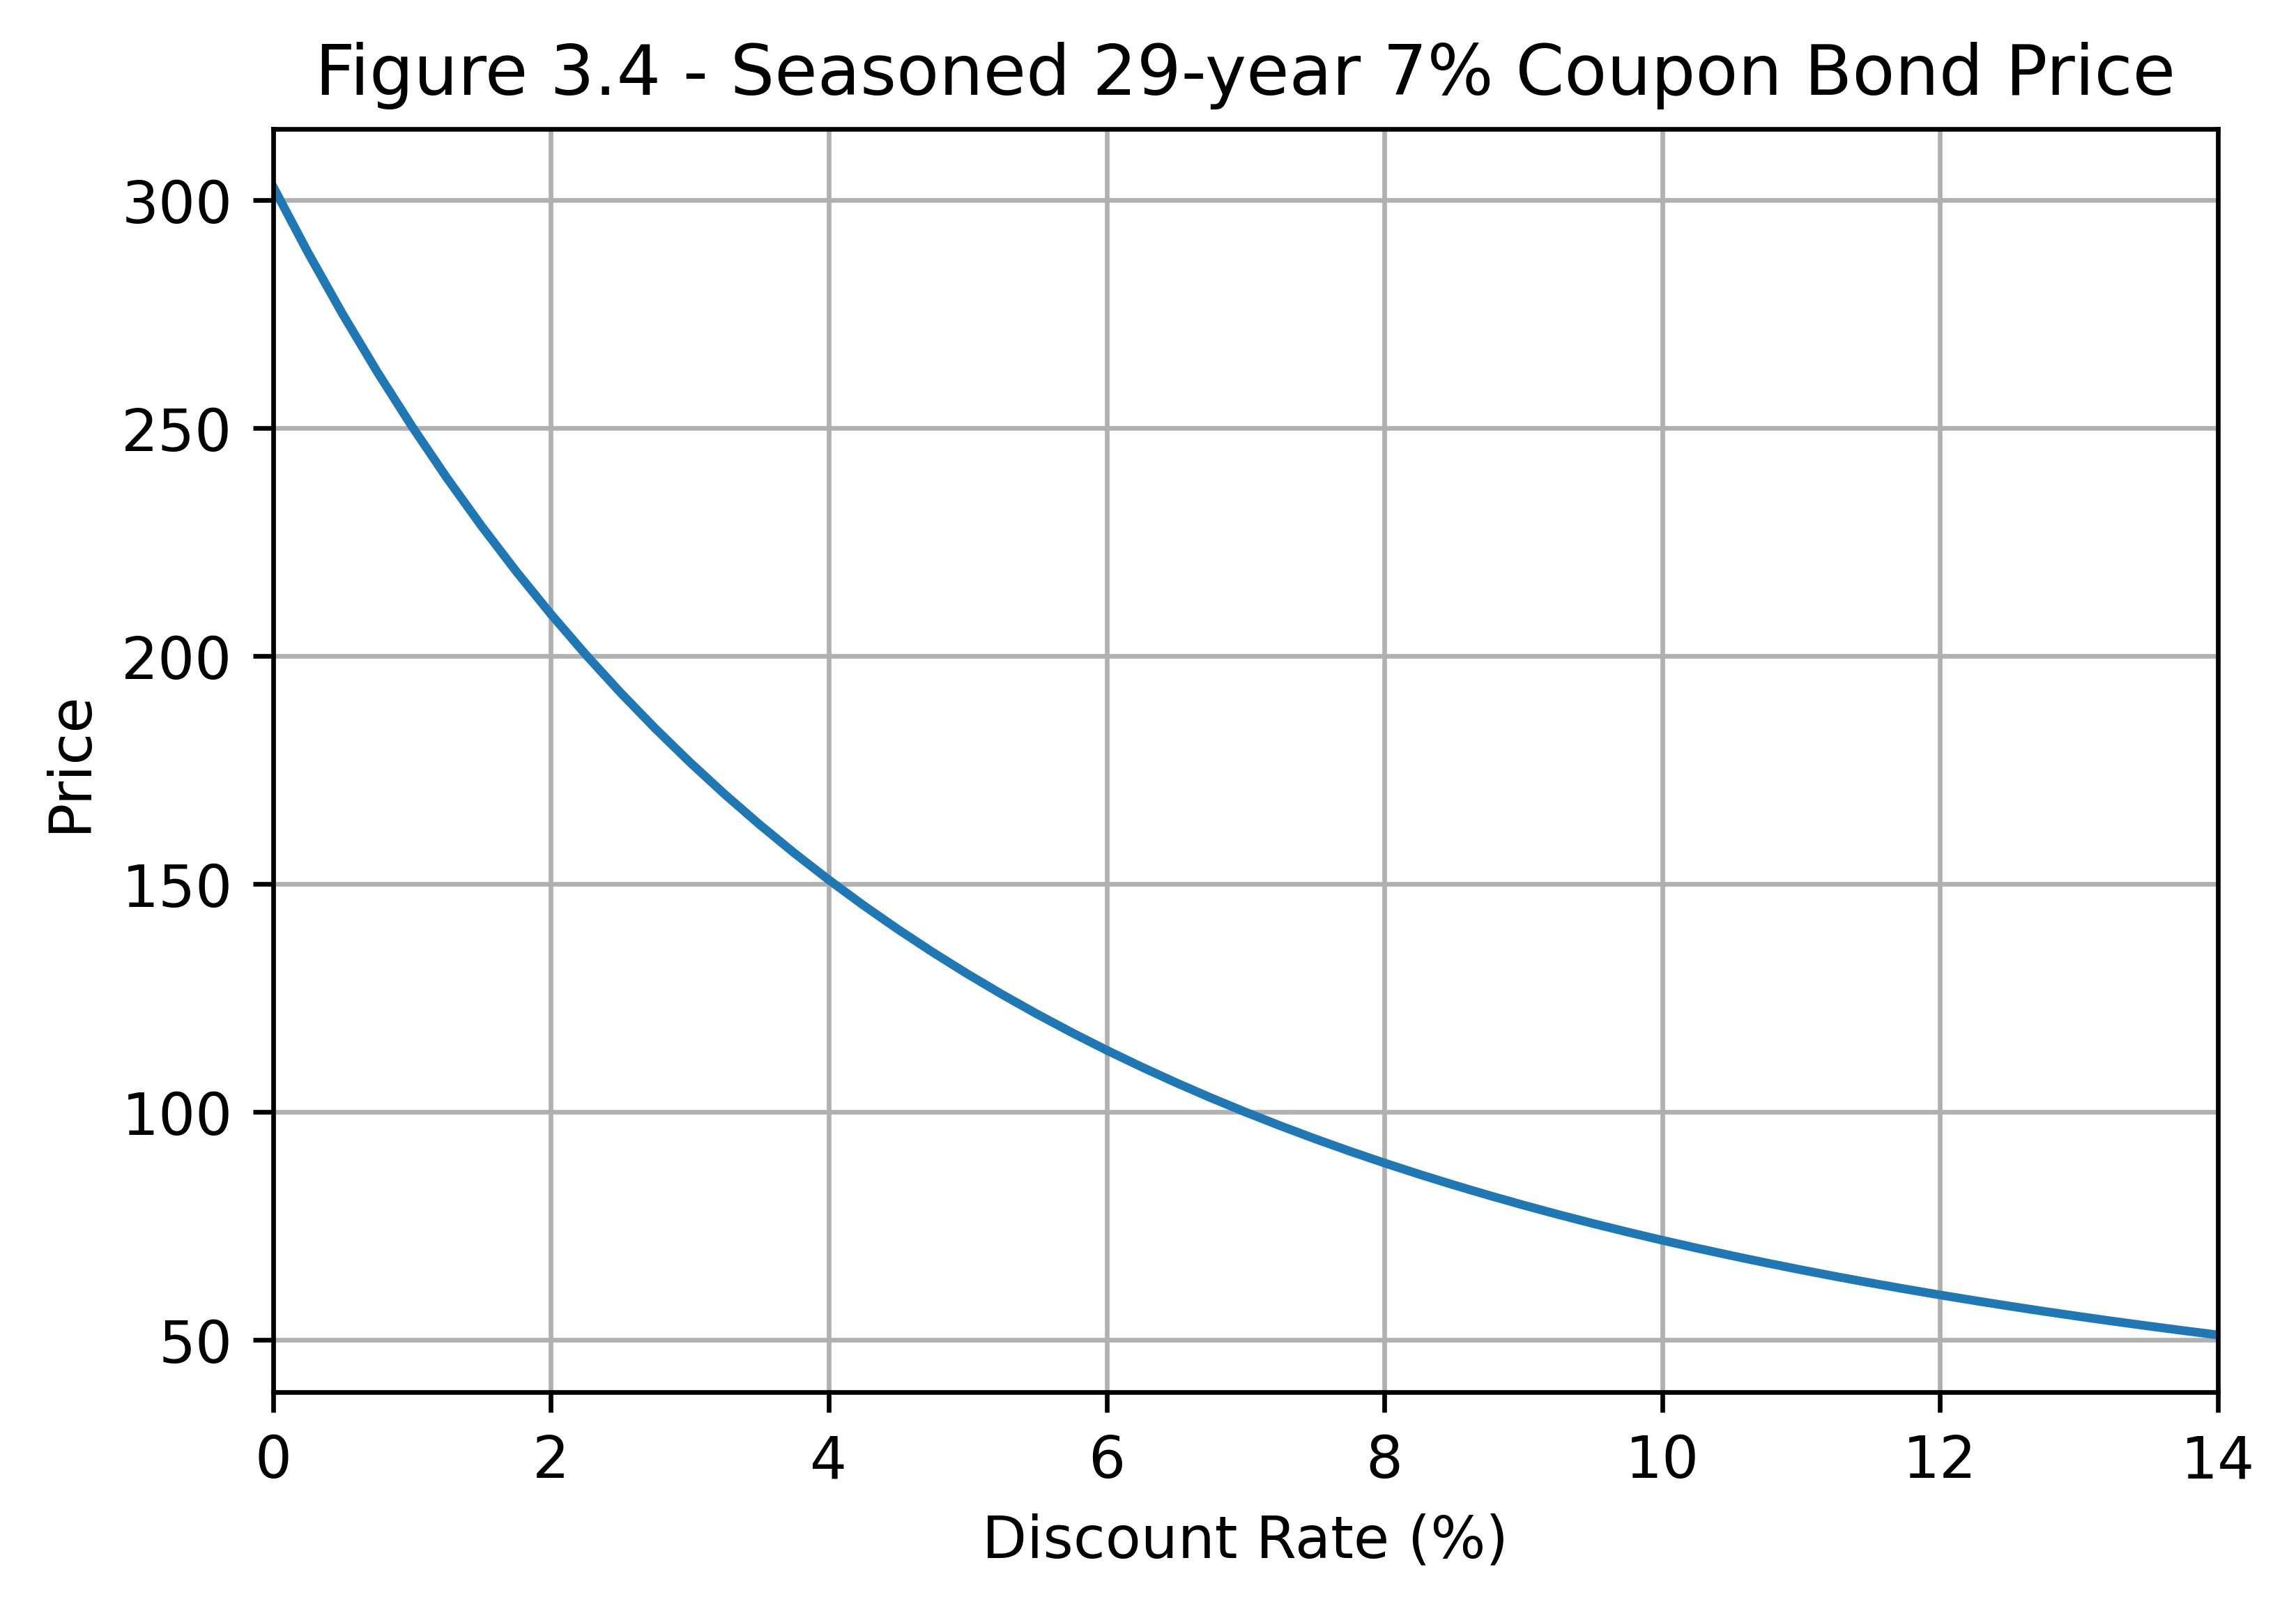

In [5]:
#Code Segment 3.4
# Plot bond prices using Formula 3.3
# Function formula3p3 is in qrpm_funcs
x = np.arange(0, 14.25, .25)
coupon=7
years=29
y=[qf.formula3p3(coupon,rate,years) for rate in x]
plt.plot(x, y)

## Configure the graph
str_title='Figure 3.4 - Seasoned %d'% years
str_title+='-year %d'% coupon
str_title+='% Coupon Bond Price'
plt.title(str_title)
plt.xlabel('Discount Rate (%)')
plt.ylabel('Price')
plt.xlim(0,14)
plt.grid(True)
plt.show();

## Code segment 3.5  
Figure 3.5 in Section 3.4.2

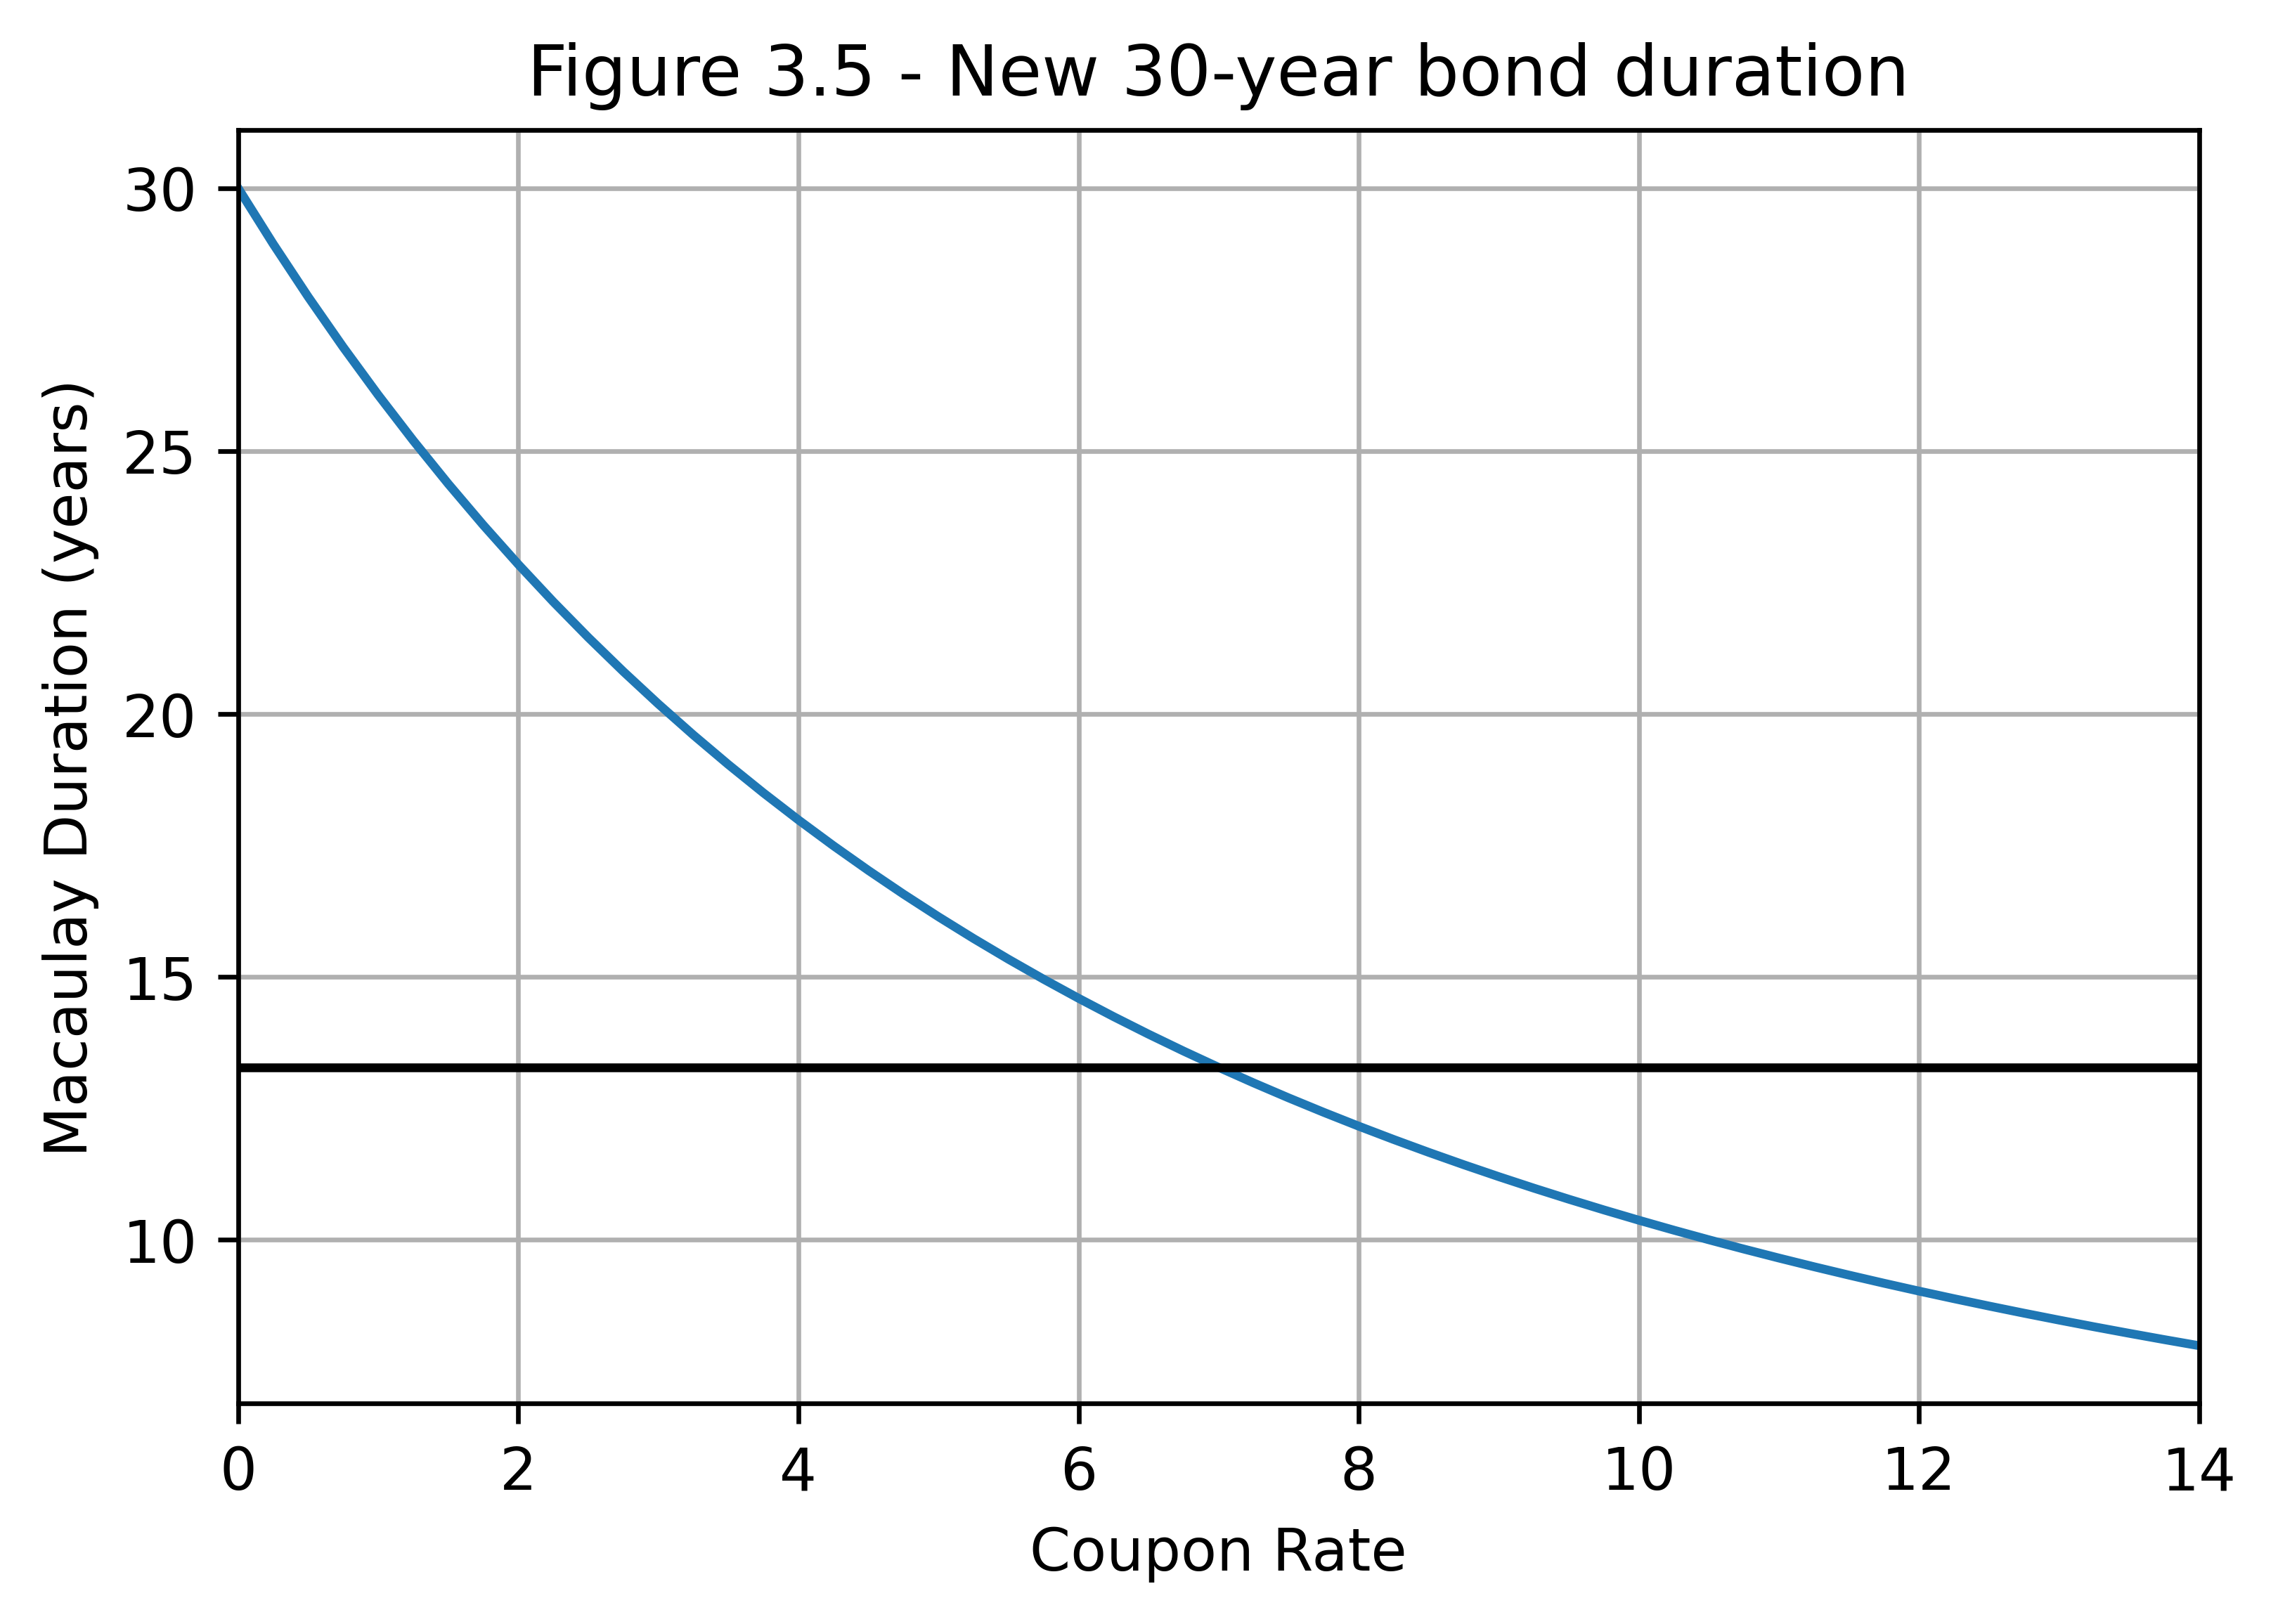

In [6]:
#Code Segment 3.5
#Plot duration of a newly issued bullet bond
#with (coupon=discount rate)
x = np.arange(0, 14.25, .25)
years=30
y=[qf.formula3p7(coupon,coupon,years) for coupon in x]
plt.plot(x, y)

#Show the duration of the 7% coupon bond for reference
coupon_7_dur=[qf.formula3p7(7.,7.,years)]*len(x)
plt.plot(x,coupon_7_dur,color='black')

## Configure the graph
str_title='Figure 3.5 - New %d'% years
str_title+='-year bond duration'
plt.title(str_title)
plt.xlabel('Coupon Rate')
plt.ylabel('Macaulay Duration (years)')
plt.xlim(0,14)
plt.grid(True)
plt.show()

## Code segment 3.6  
Figure 3.6 in Section 3.4.2

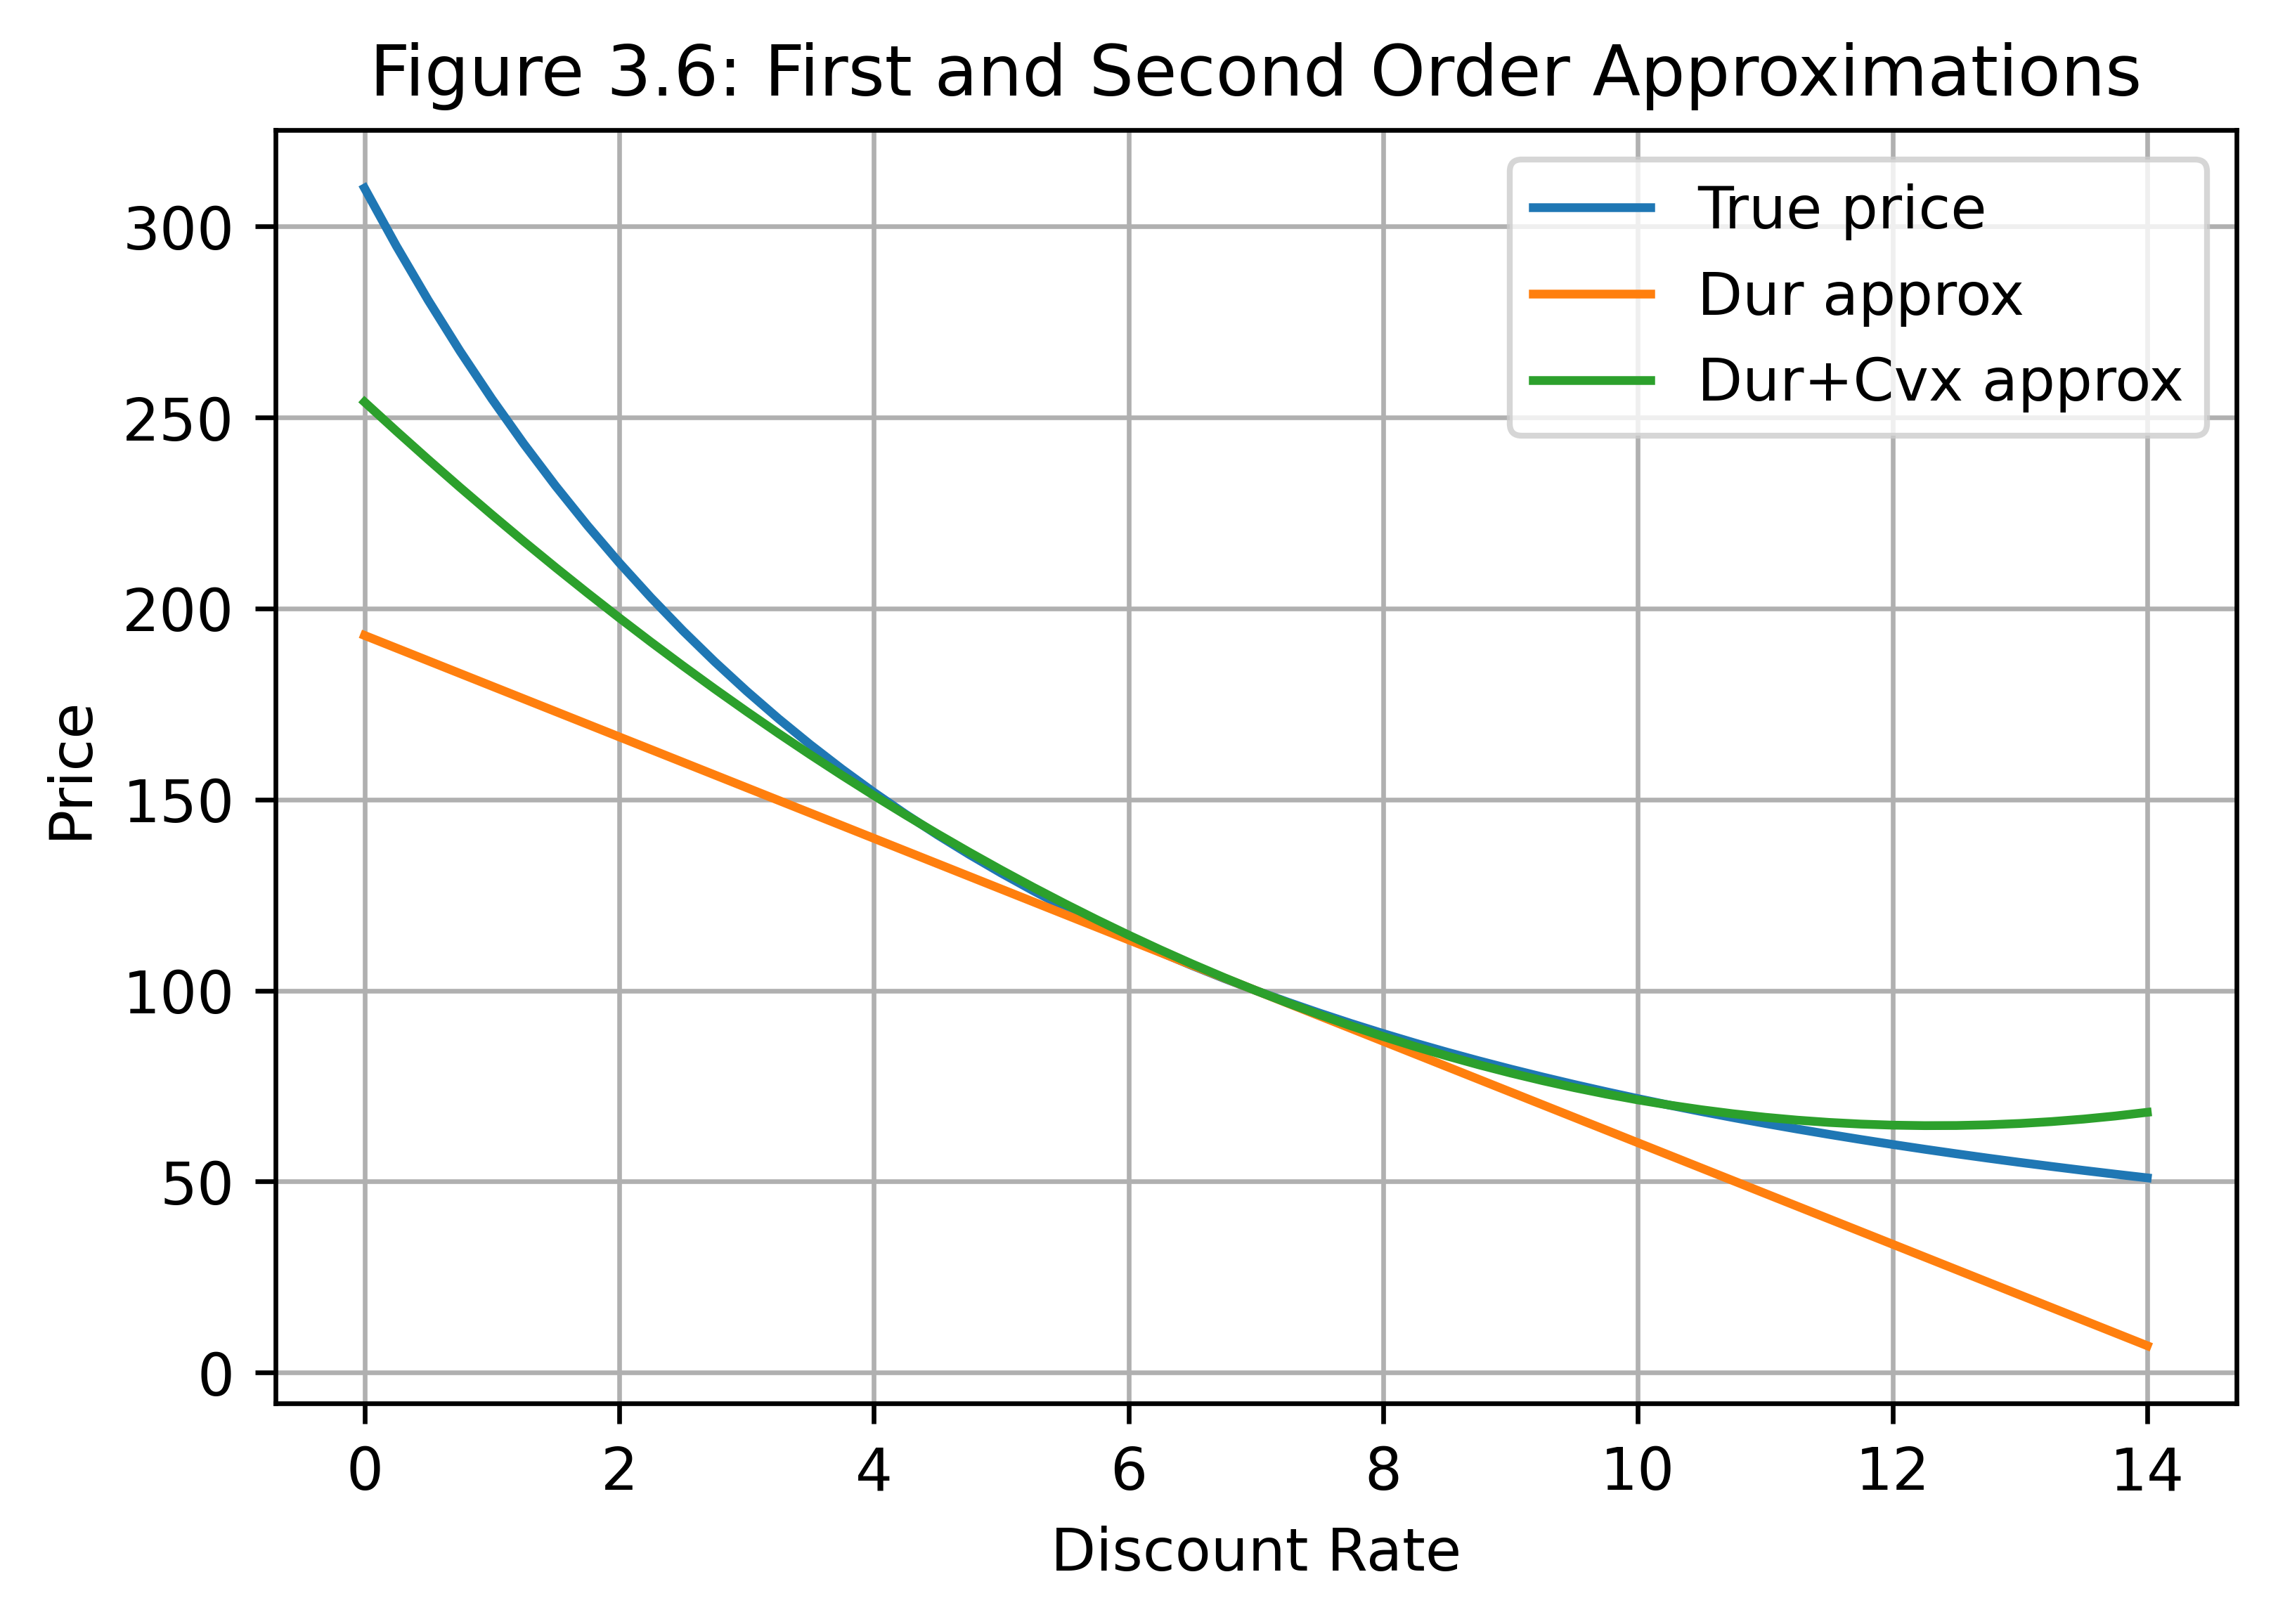

In [7]:
#Code Segment 3.6
#Show a graph of true price of a 7% coupon, 30-year bond
#at different discount rates; compare with duration
#approximation and duration+convexity approximation
x = np.arange(0, 14.25, .25)
years=30
baserate=7
#Get the base price from formula 3.3
baseprice=qf.formula3p3(baserate,baserate,years)
#Get the base duration from formula 3.7
basedur=qf.formula3p7(baserate,baserate,years)
#Get the base convexity formula 3.8
basecvx=qf.formula3p8(baserate,baserate,years)
#y holds prices computed from formula 3.3 at different discount rates
y=[qf.formula3p3(baserate,rate,years) for rate in x]
# Duration-only
y1=[baseprice-basedur*(rate-baserate) for rate in x]
# Duration and convexity
y2=[y1[i]+.5*basecvx*(rate-baserate)**2/100 for i,rate in enumerate(x)]

plt.plot(x, y, label='True price')
plt.plot(x, y1, label='Dur approx')
plt.plot(x, y2, label='Dur+Cvx approx')
## Configure the graph
plt.title('Figure 3.6: First and Second Order Approximations')
plt.xlabel('Discount Rate')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show();

## Code segment 3.7  
Figure 3.7 in Section 3.5

Most recent yearend curve (2021-12-31)
1MO 0.06
3MO 0.06
6MO 0.19
1 0.39
2 0.73
3 0.97
5 1.26
7 1.44
10 1.52
20 1.94
30 1.9


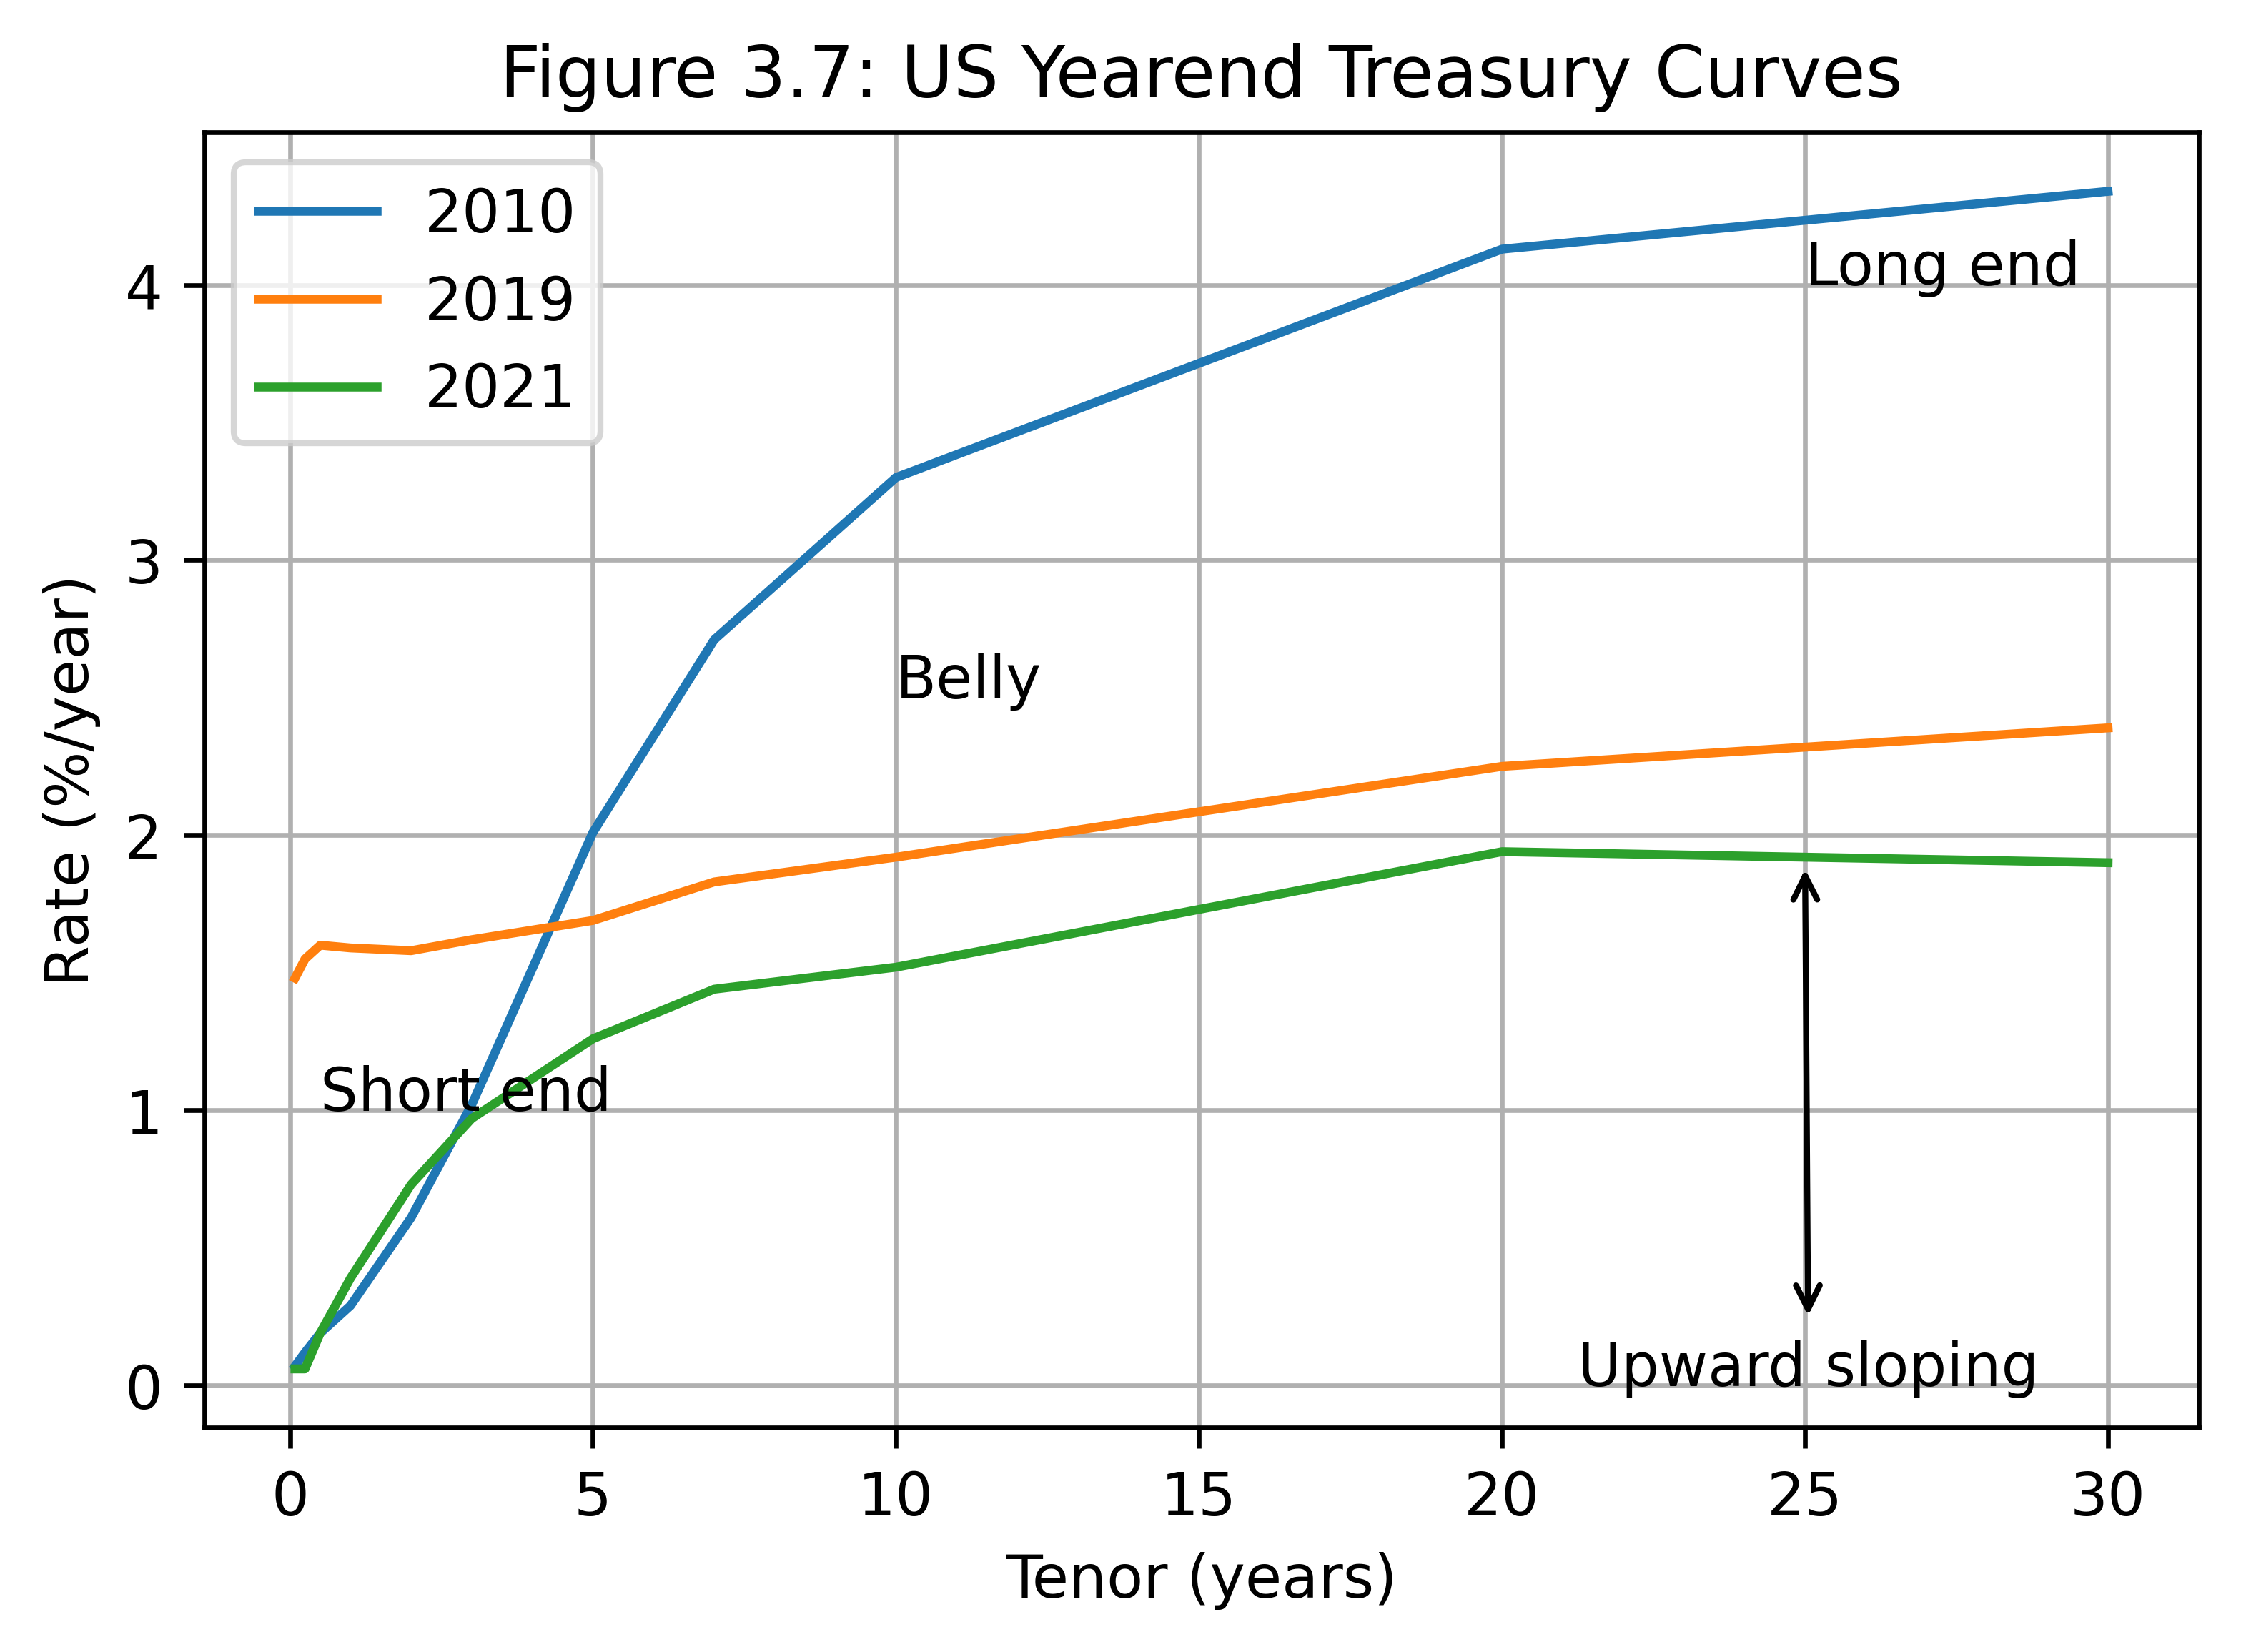

In [8]:
#Code Segment 3.7
import pandas as pd
#Plot the 2010, 2019, and most recent yearend
#US Treasury curves

seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1','DGS2','DGS3', \
             'DGS5','DGS7','DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames)

#Form the list of curve dates to display
lastday=qf.LastYearEnd()
displaydates=['2010-12-31','2019-12-31',lastday]
tenors=qf.TenorsFromNames(seriesnames)

#Plot the three lines
for i in range(3):
    year=displaydates[i][:4]
    plt.plot(tenors, ratematrix[cdates.index(displaydates[i])], label=year)

## Configure the graph
plt.title('Figure 3.7: US Yearend Treasury Curves')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.legend()
plt.grid(True)
plt.annotate('Upward sloping', xy=((tenors[-2]+tenors[-1])/2., \
            (ratematrix[cdates.index(displaydates[2])][-1]+ \
            ratematrix[cdates.index(displaydates[2])][-2])/2.), \
            xytext=(21.25, 0),
            arrowprops=dict(arrowstyle='<->', facecolor='black'))
plt.text(.5, 1, 'Short end')
plt.text(10, 2.5, 'Belly')
plt.text(25, 4, 'Long end')
plt.show;

#Display most recent curve
print("Most recent yearend curve ("+displaydates[-1]+")")
for i in range(len(seriesnames)):
    print(seriesnames[i][-len(seriesnames[i])+3:], \
          ratematrix[cdates.index(displaydates[-1])][i])

## Code segment 3.8  
Figure 3.8 in Section 3.5.4

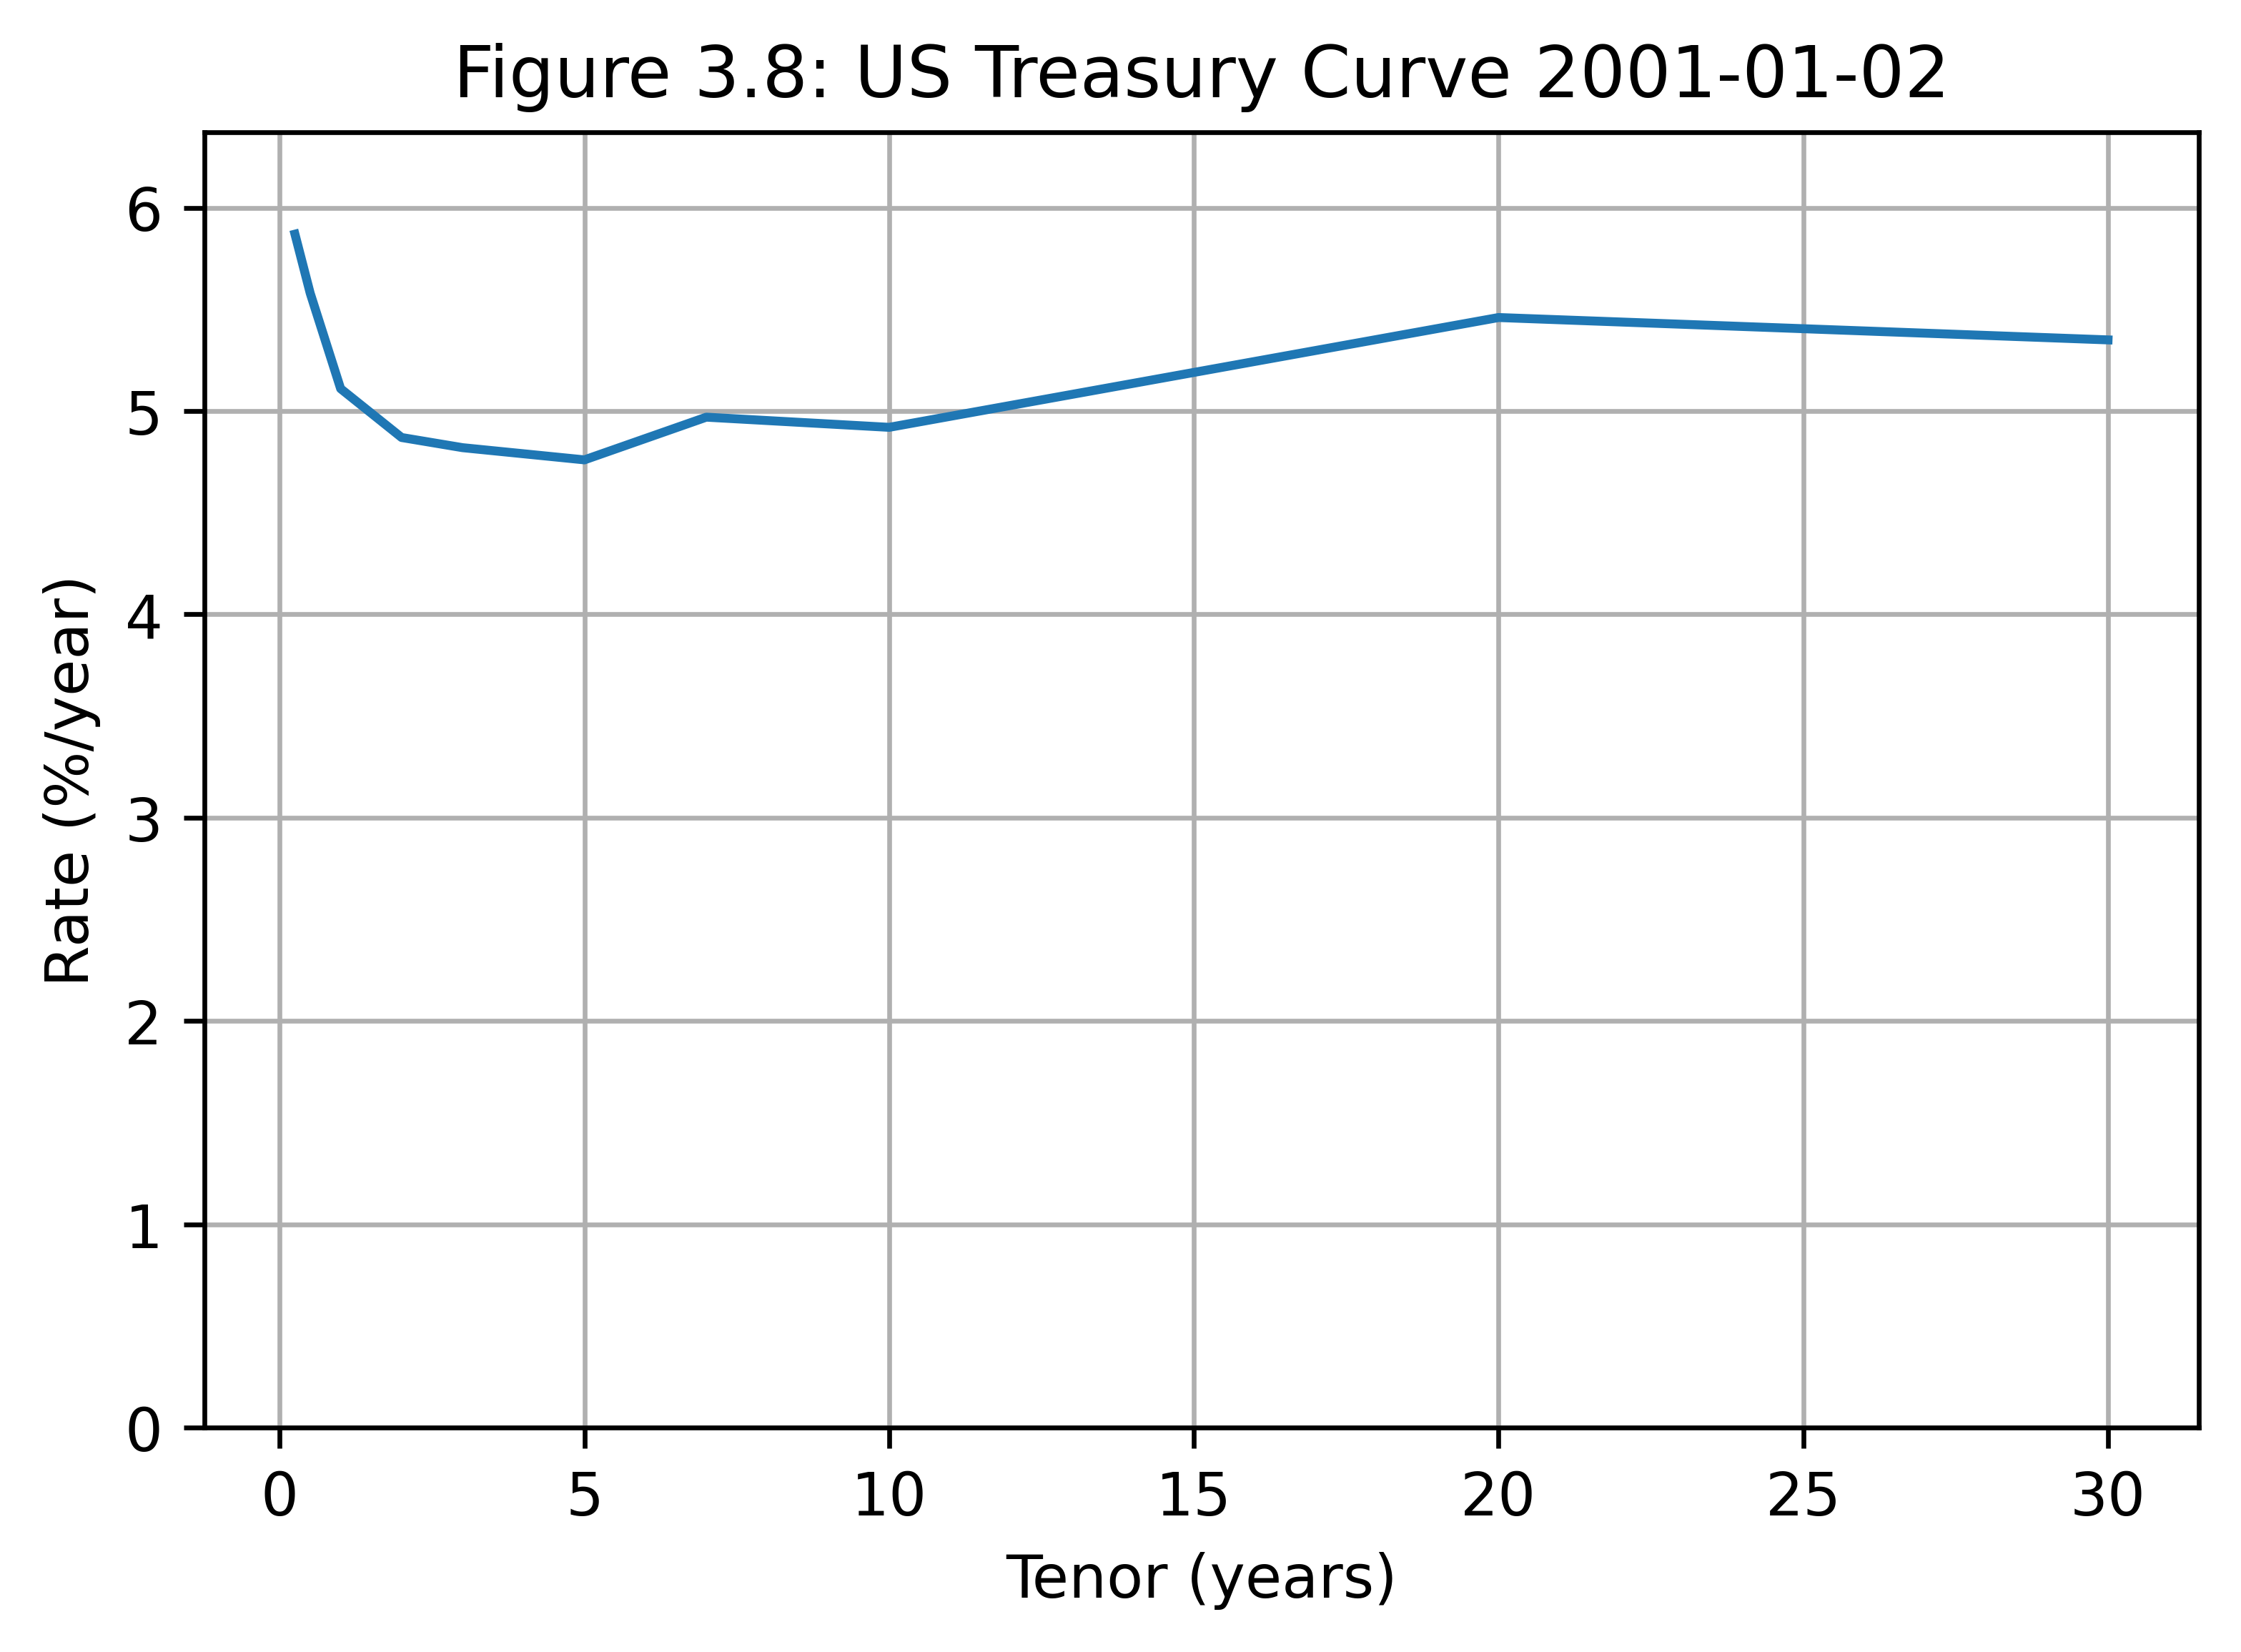

In [9]:
#Code Segment 3.8
#Show the inverted Treasury curve from 2001-01-02

targetdate='2001-01-02'
#Note no one-month rate on this date
snames_target=['DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
dates_target,ratematrix_target=qf.GetFREDMatrix( \
    snames_target,startdate=targetdate,enddate=targetdate)

plt.plot(qf.TenorsFromNames(snames_target), ratematrix_target[0])
## Configure the graph
plt.title('Figure 3.8: US Treasury Curve '+targetdate)
plt.ylim(0,max([x for x in ratematrix_target[0] if pd.notna(x)])+.5)
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.grid(True)
plt.show;

## Code segment 3.9  
Figure 3.9 in Section 3.5.4

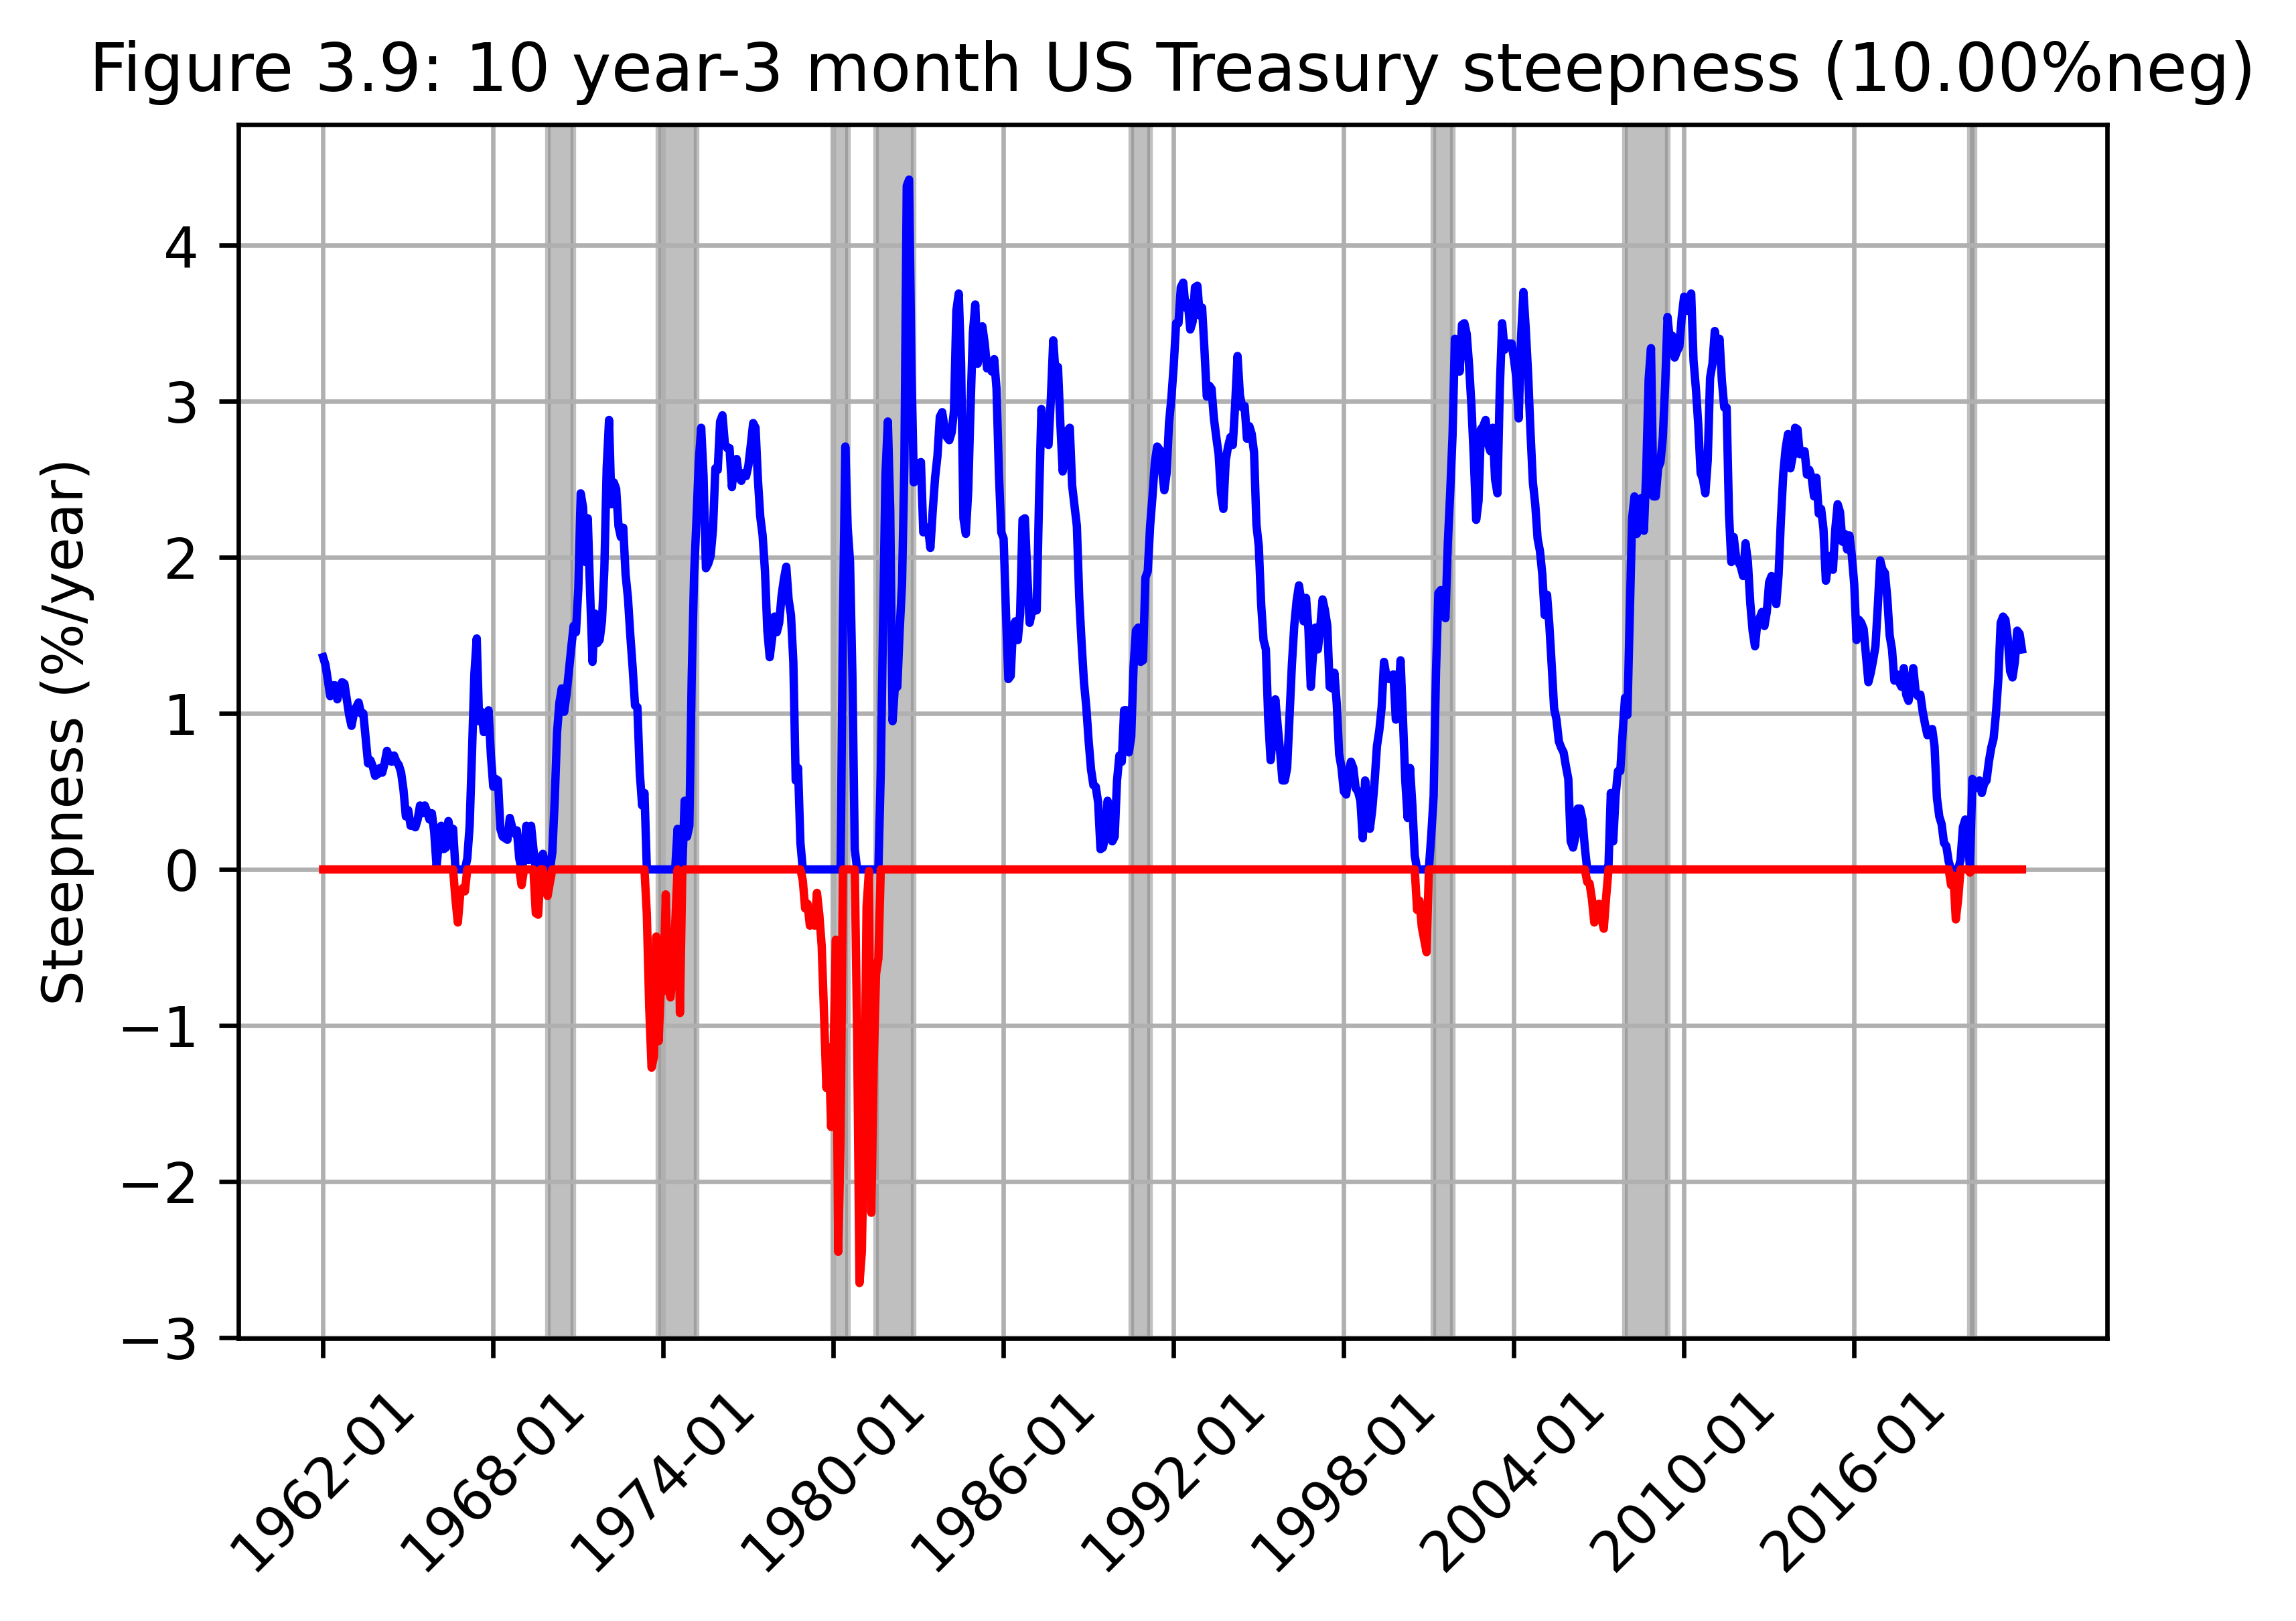

In [10]:
#Code Segment 3.9
#Code to get data for 10y - 3m US Treasury steepness and
#compare with NBER recessions since 1962

#Get 3 month rates and 10-year rates (monthly first of month)
#USREC is 0,1 indicator of NBER US recession
cdates_steep,ratematrix_steep=qf.GetFREDMatrix(['TB3MS','GS10','USREC'], \
    startdate="1962-01-01",enddate=lastday)

steeps_not_nan = [(not (np.isnan(x) or np.isnan(y) or np.isnan(z))) for [x,y,z] in ratematrix_steep]
steeps = [y-x for ([x,y,z],bool) in zip(ratematrix_steep,steeps_not_nan) if bool]
nber = [z for ([x,y,z],bool) in zip(ratematrix_steep,steeps_not_nan) if bool]
steeps_dates = [d[:7] for (d,bool) in zip(cdates_steep,steeps_not_nan) if bool]
                
#Compute percentage negative
n_steeps=len(steeps)
num_neg=sum(x<0 for x in steeps)
pct_neg_str="%.2f"%float(100*num_neg/n_steeps)

#Make the graph; different colors of positive and negative slopes
x=np.arange(n_steeps)
plt.plot(x,[0 if steep < 0 else steep for steep in steeps],color='b')
plt.plot(x,[0 if steep >=0 else steep for steep in steeps],color='r')

#Mark recessions (http://www.nber.org/cycles/cyclesmain.html) in red
rec_starts=[]
rec_finishes=[]
in_recession = (nber[0] == 1.)
for t in range(1,len(nber)):
    if in_recession:
        if nber[t] == 0.:
            rec_finishes.append(steeps_dates[t-1])
            in_recession = False
    else:
        if nber[t] == 1.:
            rec_starts.append(steeps_dates[t-1])  #t-1 lines up with NBER
            in_recession = True
            
#Check if still in recession
if len(rec_starts) > len(rec_finishes):
    rec_finishes.append(steeps_dates[-1])

for idx in range(len(rec_starts)):
    rec_start=steeps_dates.index(rec_starts[idx])
    rec_finish=steeps_dates.index(rec_finishes[idx])
    plt.axvspan(rec_start, rec_finish, alpha=0.5, color='gray')
## Configure the graph
plt.title('Figure 3.9: 10 year-3 month US Treasury steepness ('+pct_neg_str+'%neg)')
stride=int(len(steeps)/10)
plt.xticks(x[::stride],steeps_dates[::stride],rotation=45)
plt.ylabel('Steepness (%/year)')
plt.grid(True)
plt.show;

## Code segment 3.10  
Figure 3.10 in Section 3.5.5

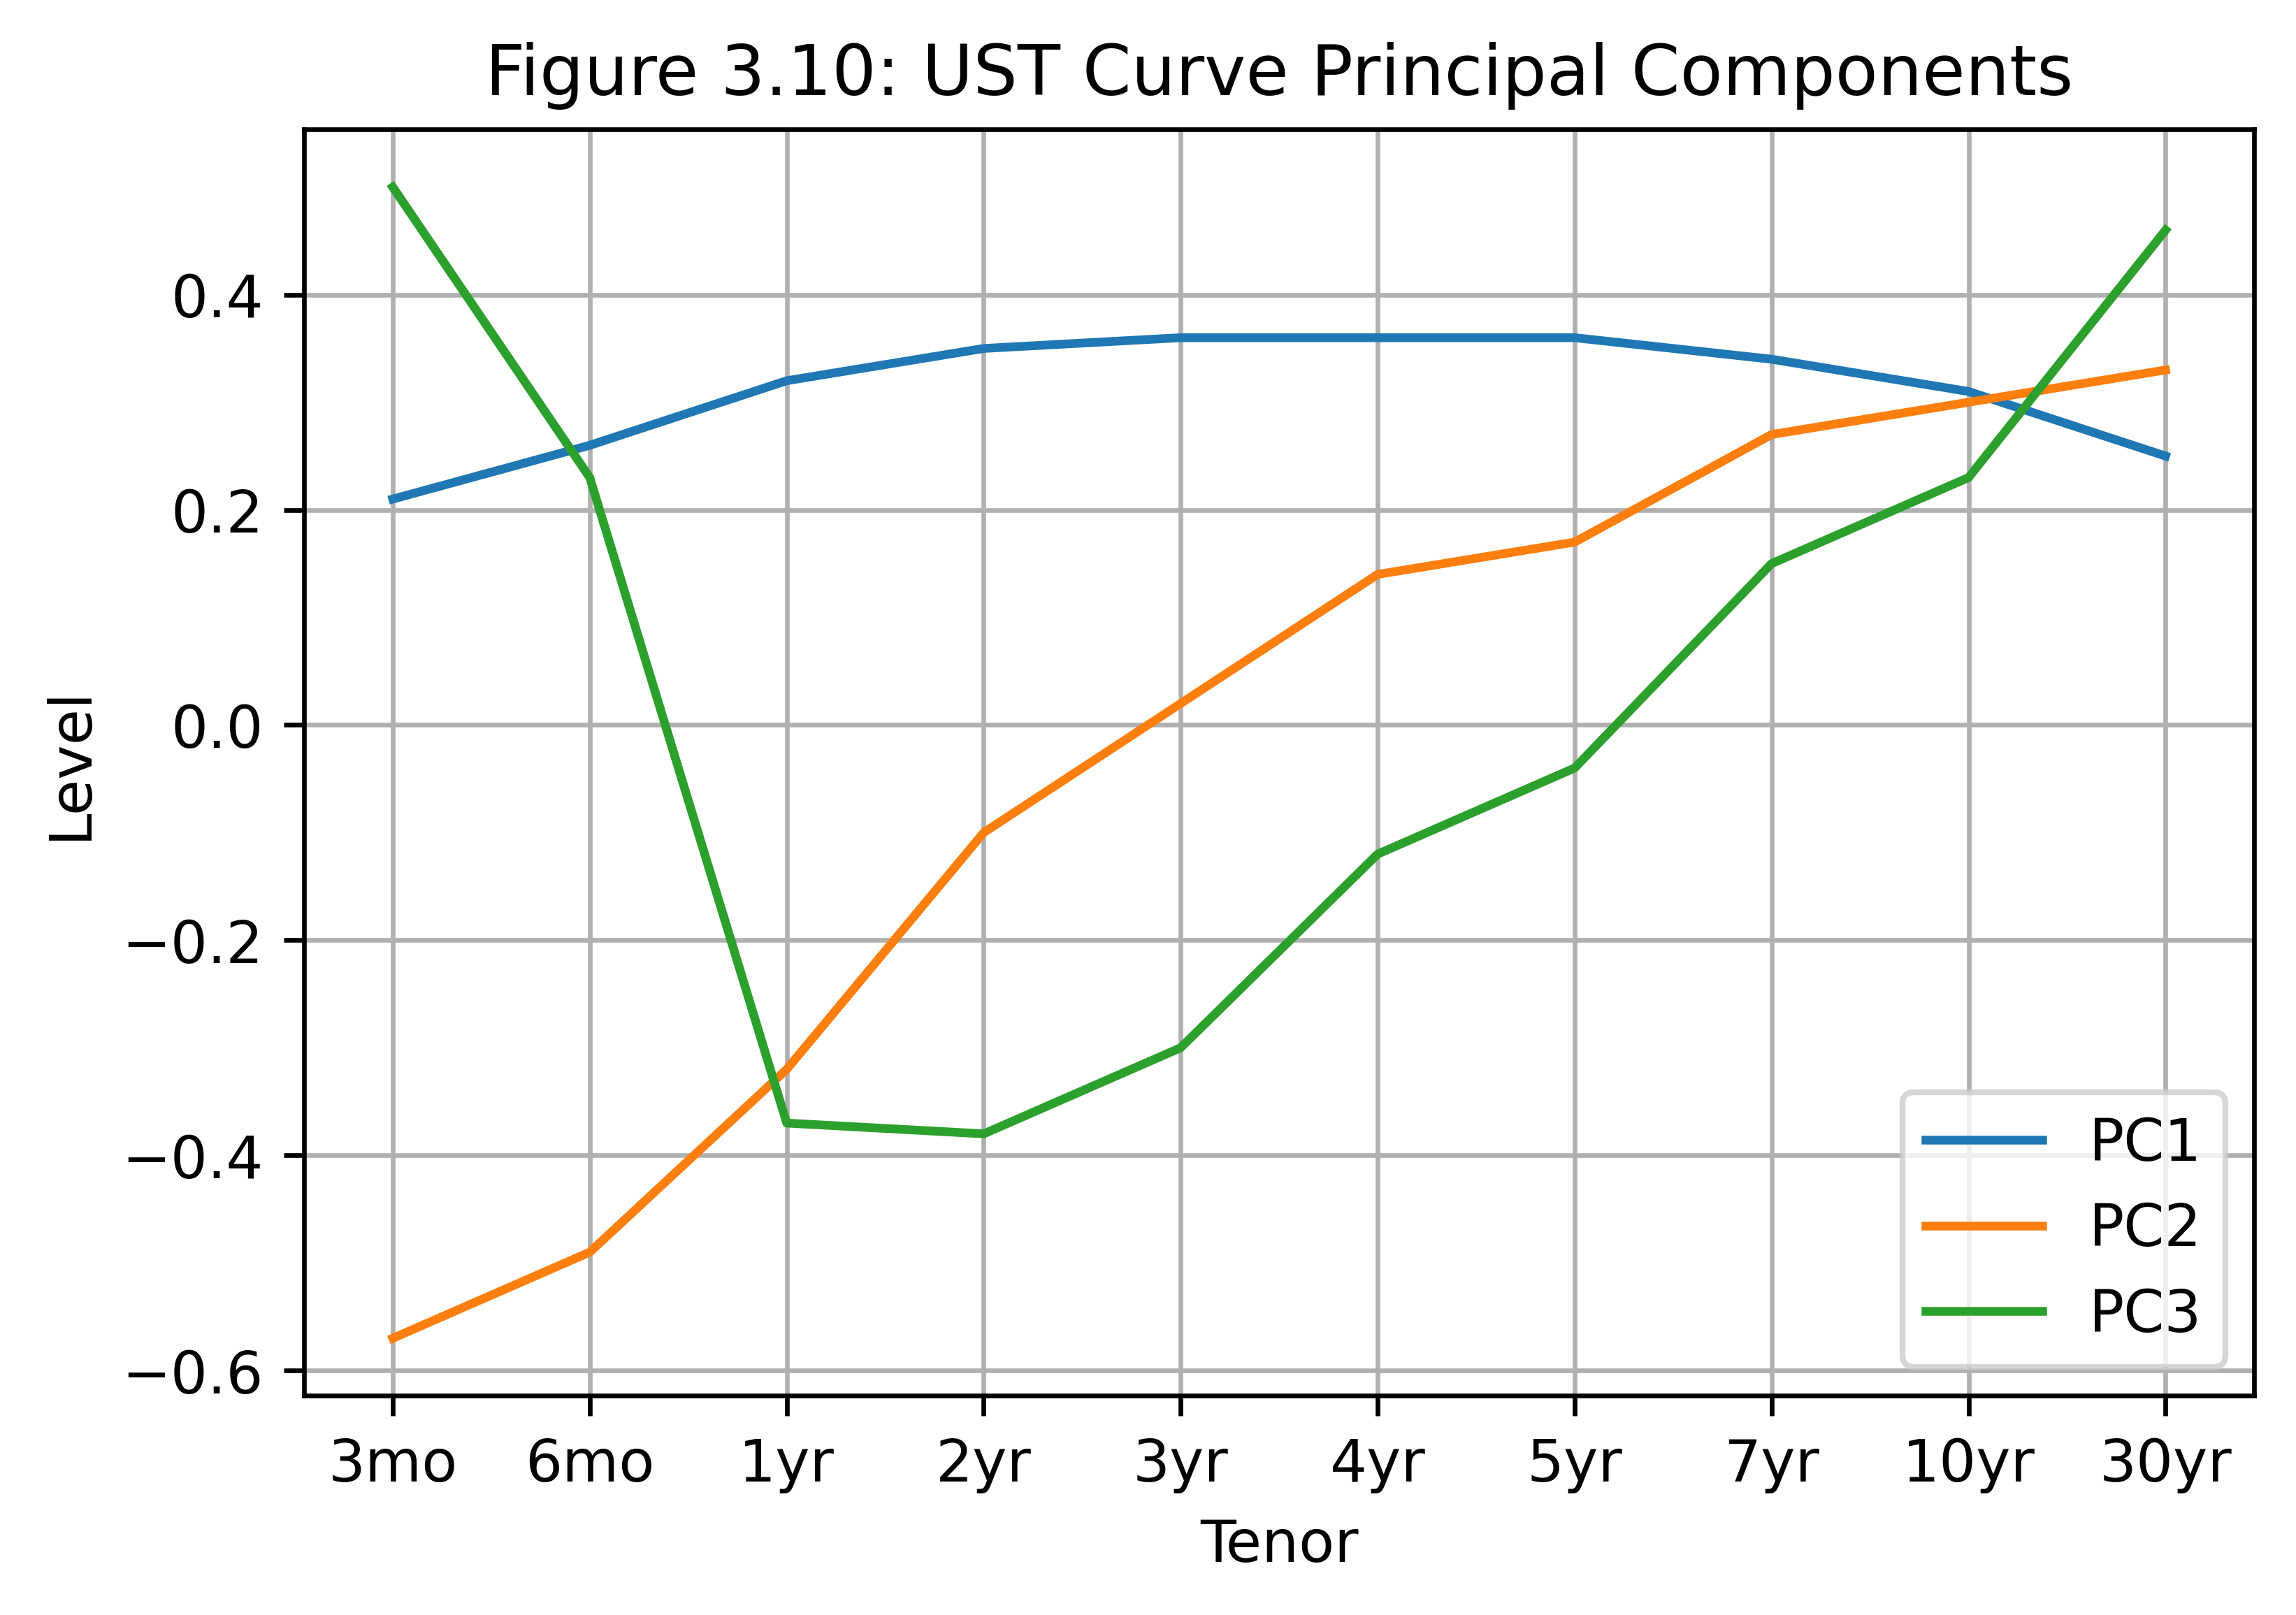

In [11]:
#Code Segment 3.10
#Plot first 3 principal components from Table 2 in
#https://pdfs.semanticscholar.org/c0ca/bab4aebf9d04e58a3084e4f35ea4d57045aa.pdf
tenornames=['3mo','6mo','1yr','2yr','3yr',
        '4yr','5yr','7yr','10yr','30yr']
tenornumbers=range(len(tenornames))
pc1=[0.21,0.26,0.32,0.35,0.36,
     0.36,0.36,0.34,0.31,0.25]
pc2=[-0.57,-0.49,-0.32,-0.1,0.02,
     0.14,0.17,0.27,0.3,0.33]
pc3=[0.5,0.23,-0.37,-0.38,-0.3,
     -0.12,-0.04,0.15,0.23,0.46]
plt.plot(tenornumbers, pc1, label='PC1')
plt.plot(tenornumbers, pc2, label='PC2')
plt.plot(tenornumbers, pc3, label='PC3')

## Configure the graph
plt.title('Figure 3.10: UST Curve Principal Components')
plt.xlabel('Tenor')
plt.ylabel('Level')
plt.legend()
plt.xticks(tenornumbers, tenornames)
plt.grid(True)
plt.show;

## Code segment 3.11  
Figure 3.11 in Section 3.5.6

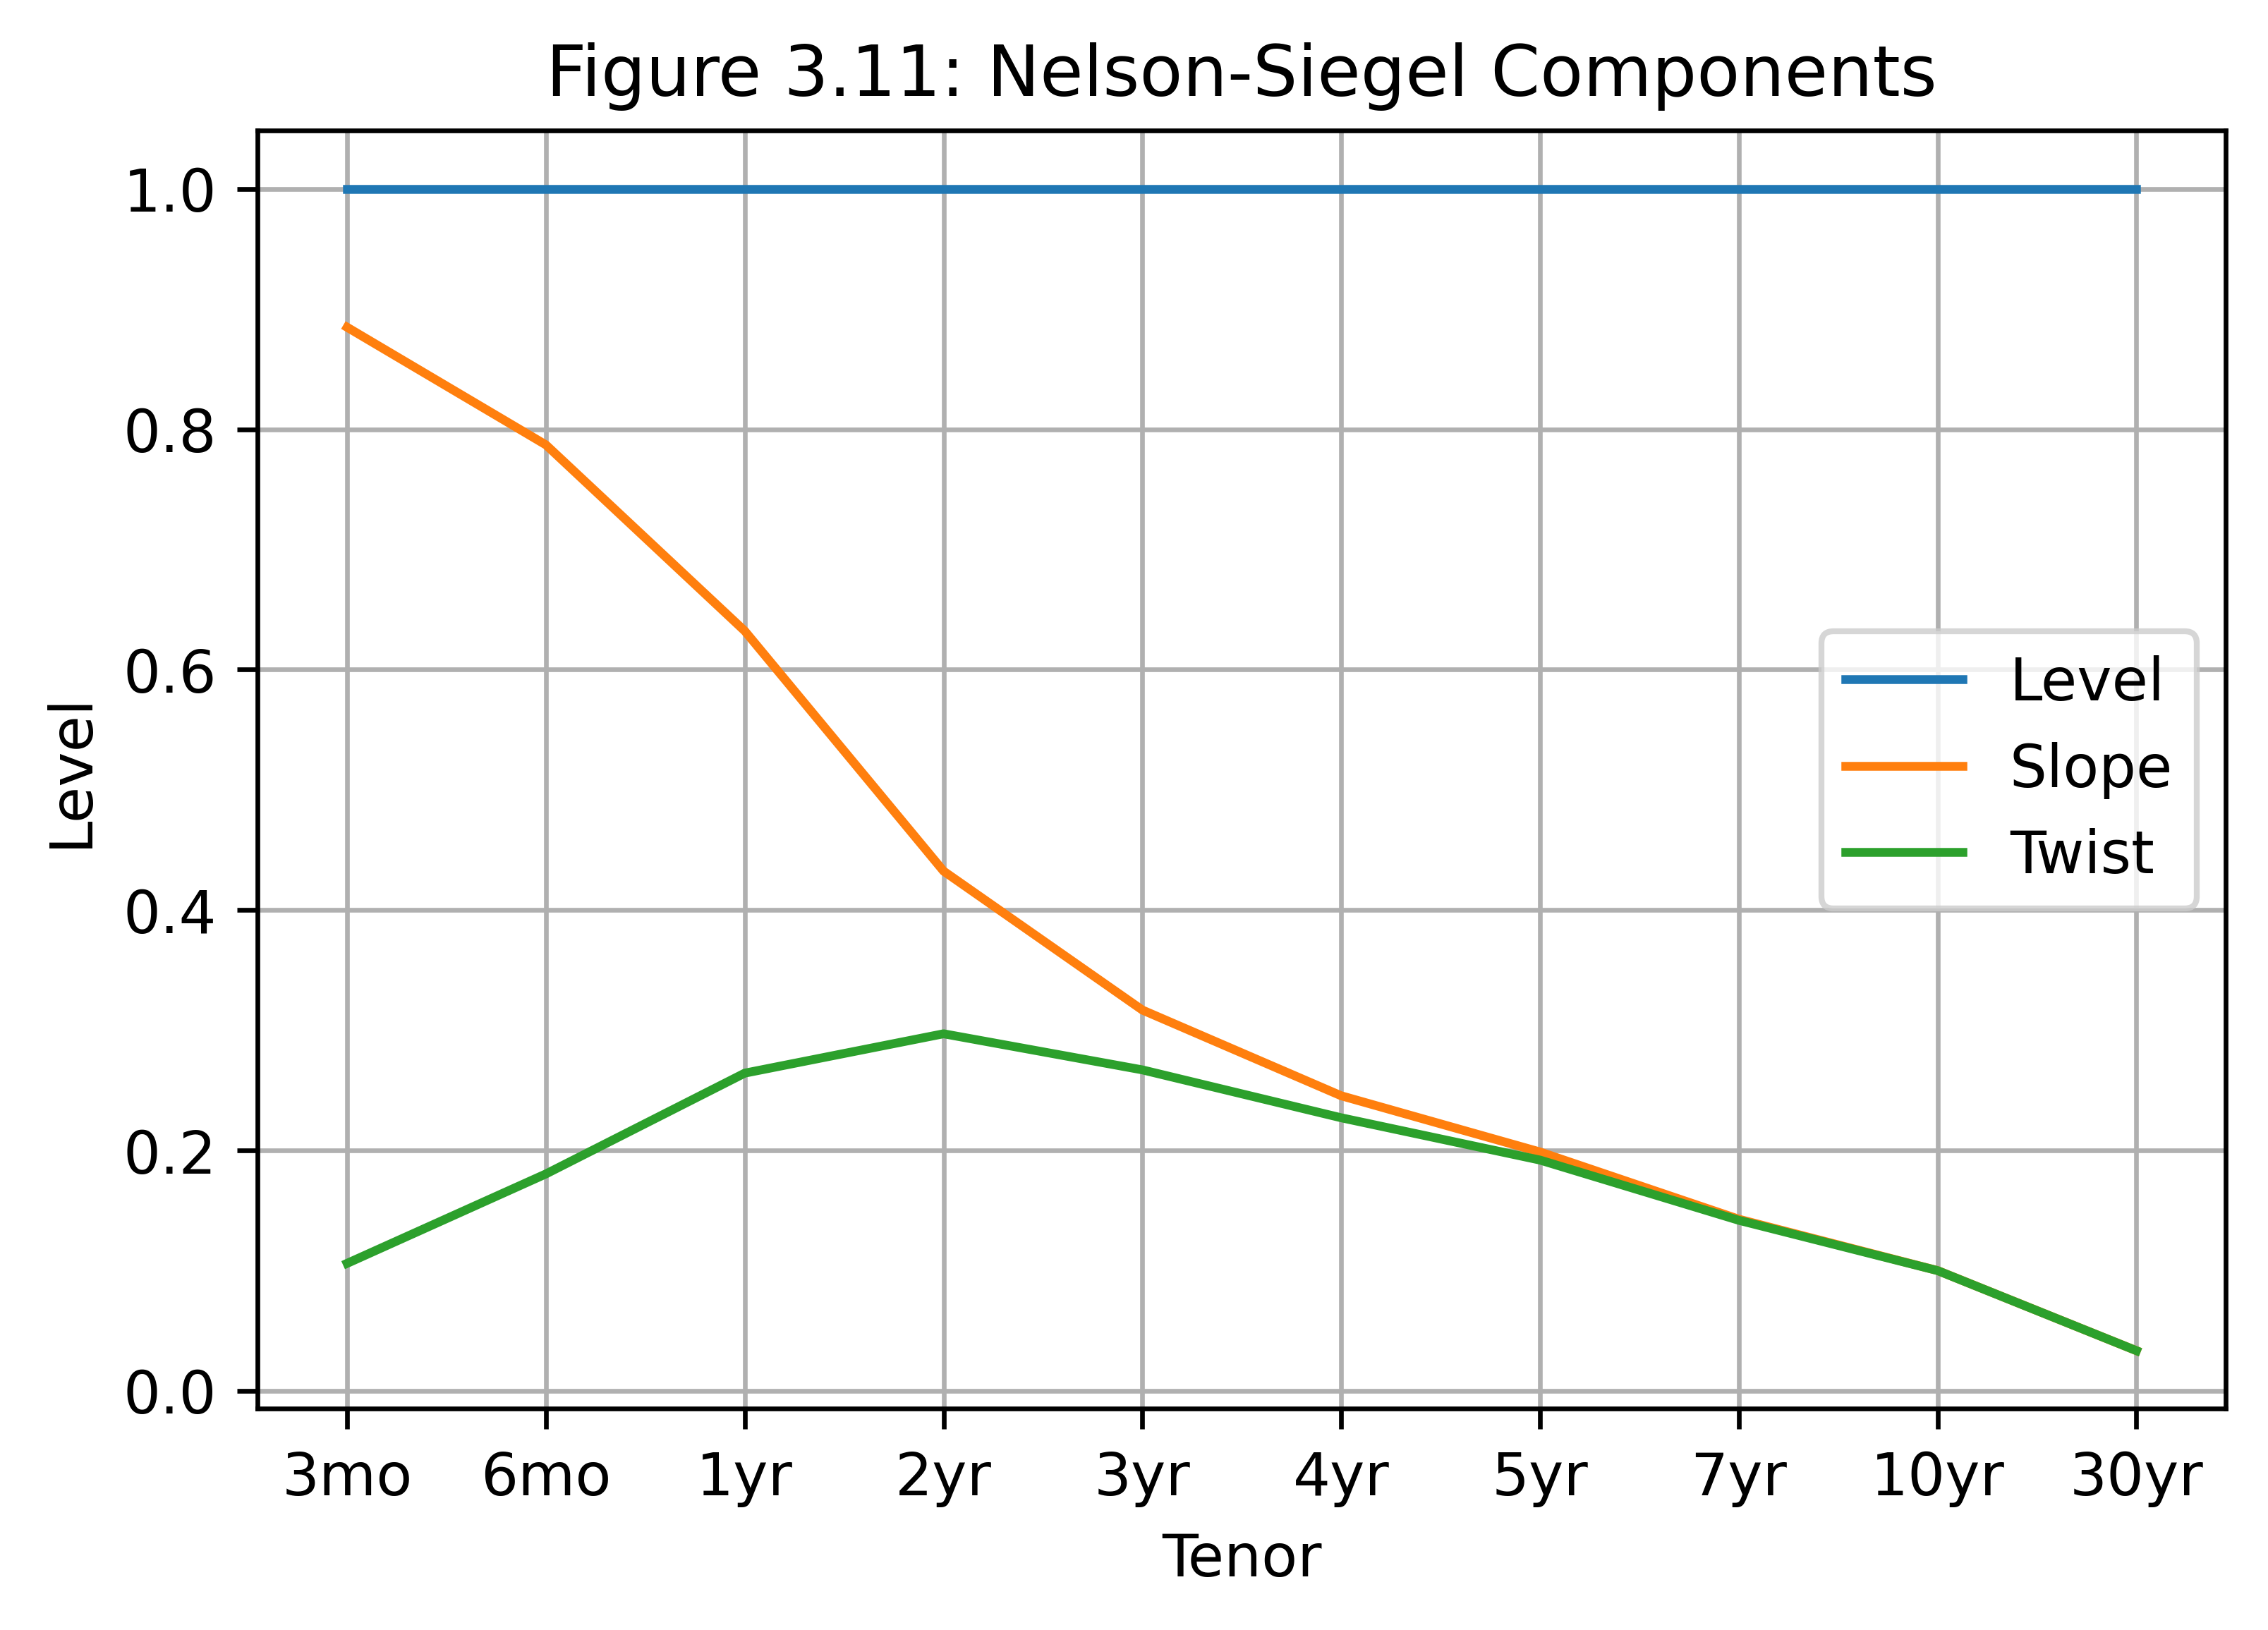

In [12]:
#Code Segment 3.11
## Nelson-Siegel curve components
## Use tenornames and tenornumbers from previous code segment

def ns_slope(t):
    #Nelson-Siegel slope component
    return((1-np.exp(-t))/t)

def ns_twist(t):
    #Nelson-Siegel twist component
    return((1-np.exp(-t)*(1+t))/t)

tenors=[.25, .5, 1., 2., 3., 4., 5., 7., 10., 30.]
n=len(tenors)
plt.plot(tenornumbers, [1.]*n, label="Level")
plt.plot(tenornumbers, [ns_slope(t) for t in tenors], label="Slope")
plt.plot(tenornumbers, [ns_twist(t) for t in tenors], label="Twist")

## Configure the graph
plt.title('Figure 3.11: Nelson-Siegel Components')
plt.xlabel('Tenor')
plt.ylabel('Level')
plt.legend()
plt.xticks(tenornumbers, tenornames)
plt.grid(True)
plt.show;

## Code segment 3.12  
Figure 3.12 in Section 3.8

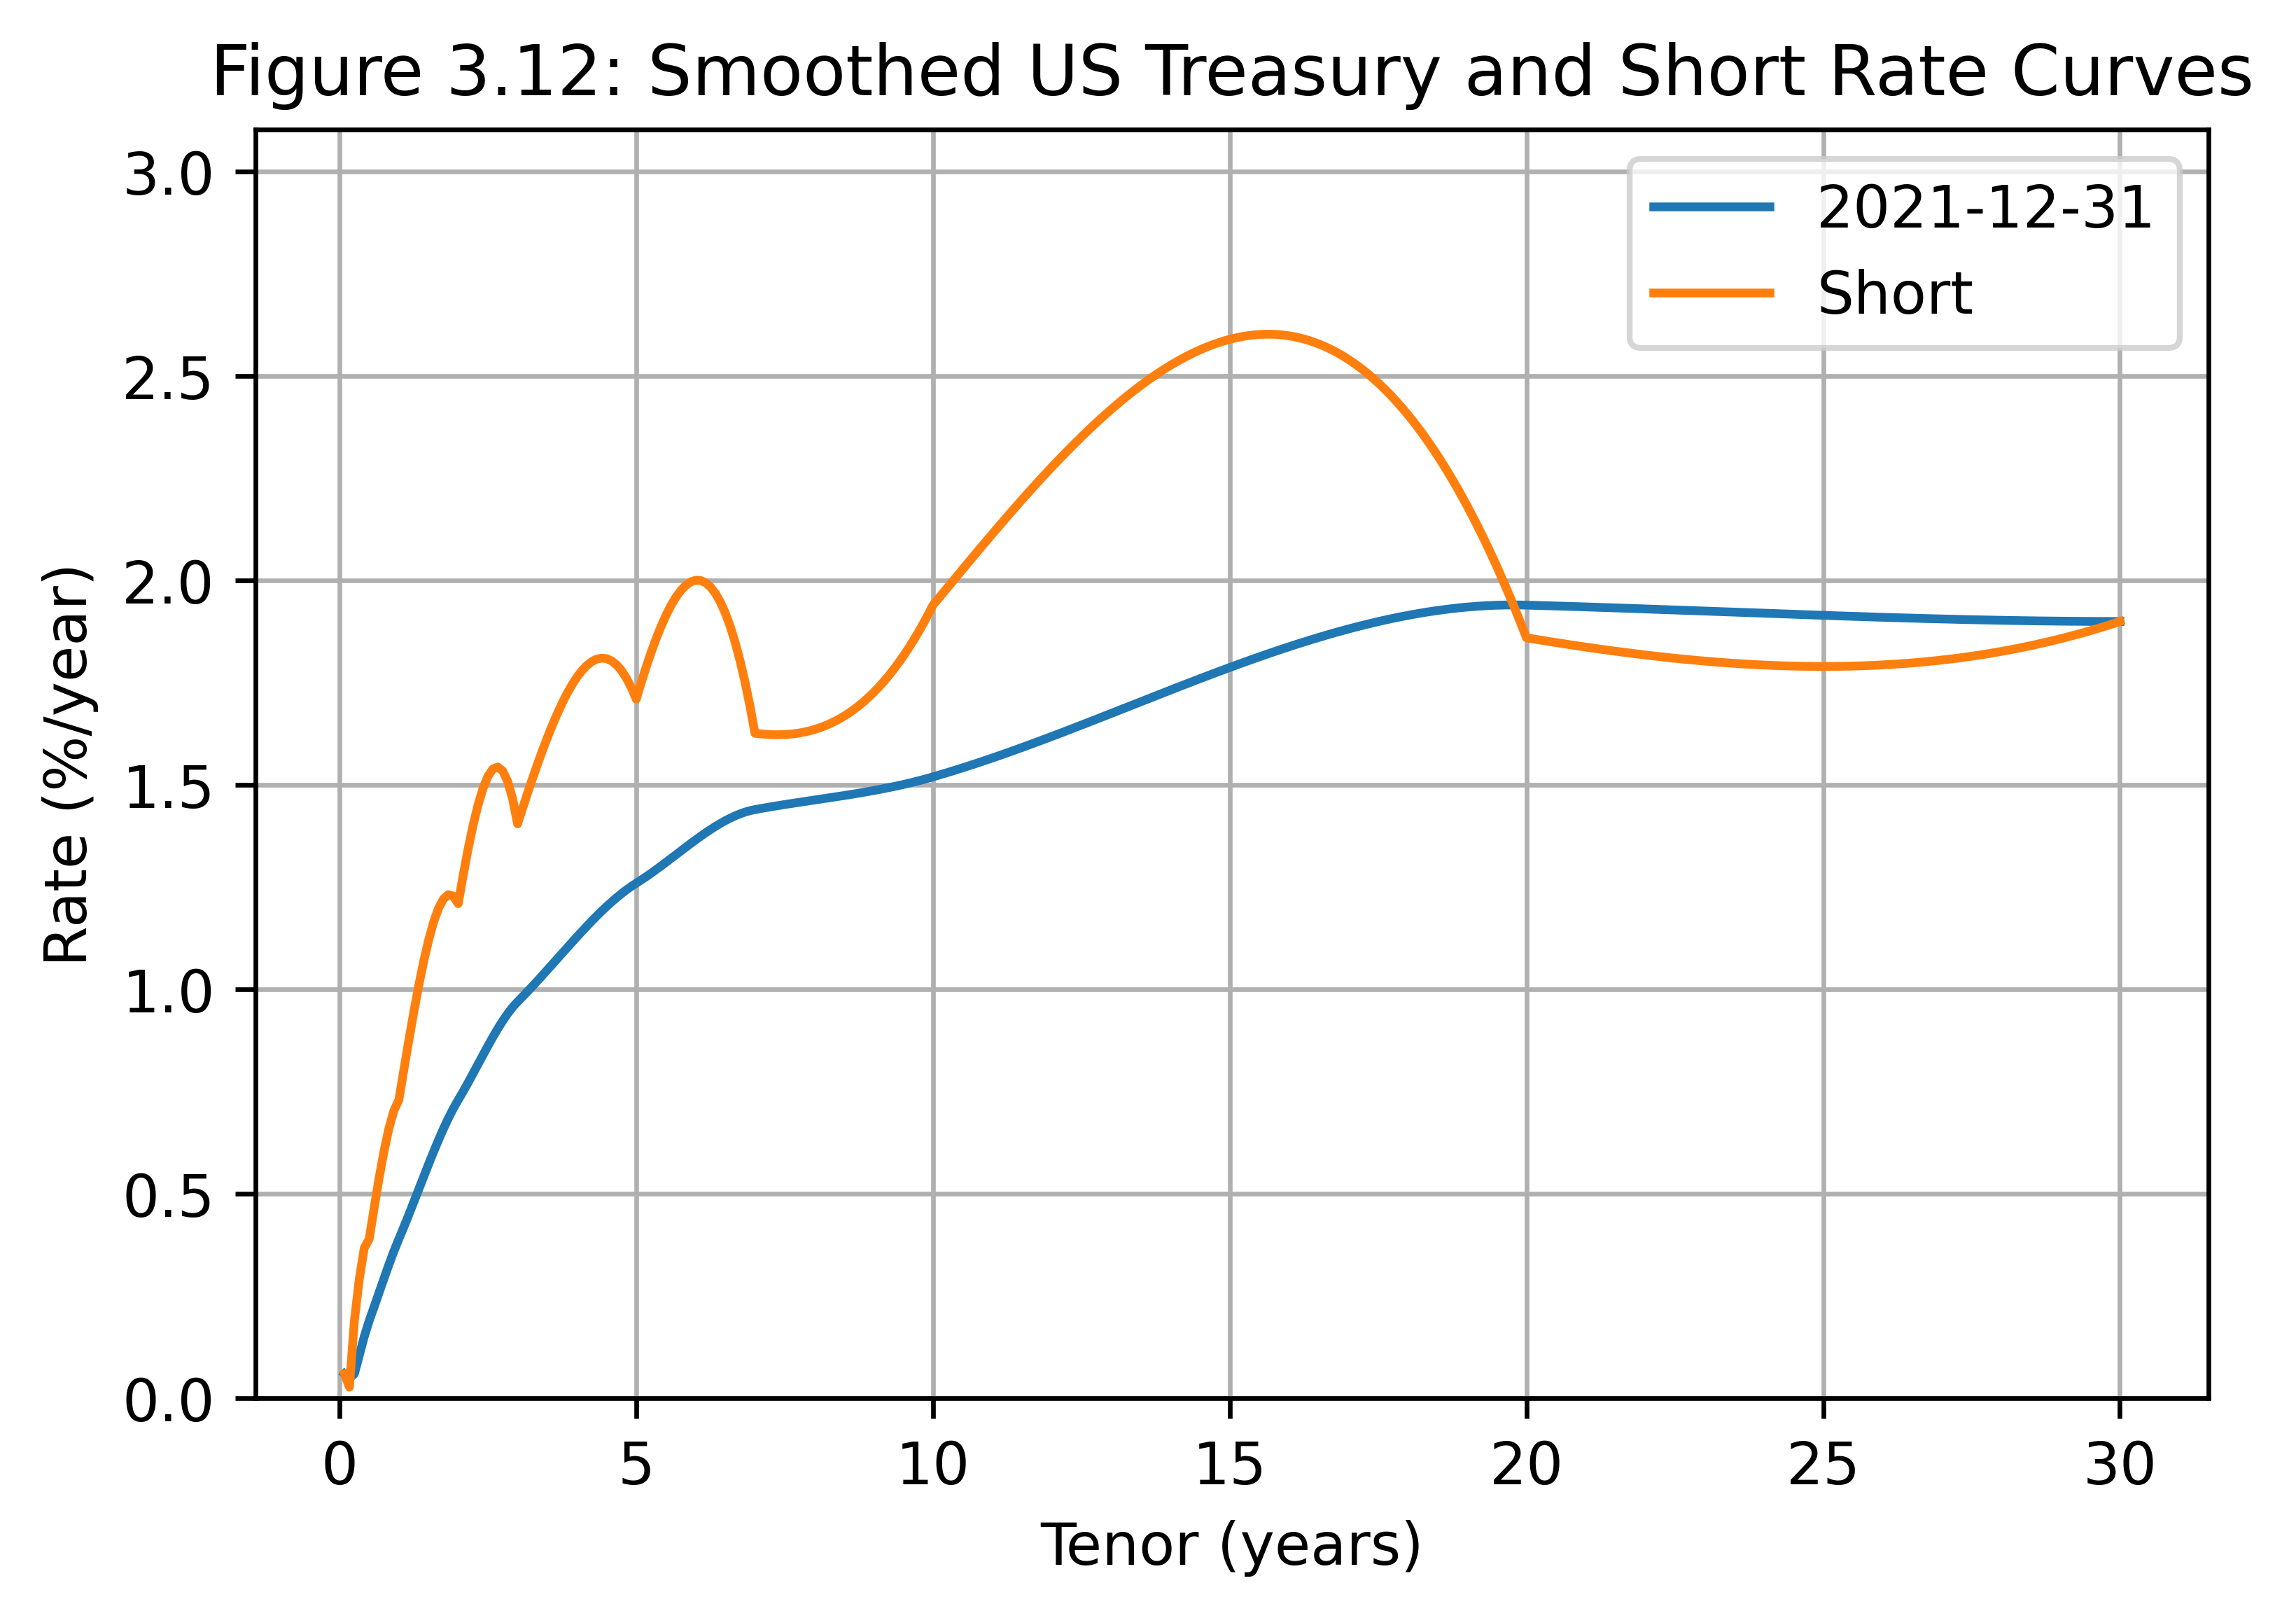

In [13]:
#Code Segment 3.12
#Get most recent yearend US Treasury curve
#Interpolate with cubic spline to monthly and compute a short
#rate curve based on that
#Plot both
import scipy.interpolate as spyi

lastday=qf.LastYearEnd()
seriesnames=['DGS1MO','DGS3MO','DGS6MO','DGS1',
             'DGS2','DGS3','DGS5','DGS7',
             'DGS10','DGS20','DGS30']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames, \
                startdate=lastday,enddate=lastday)
tenorsfromtsy=qf.TenorsFromNames(seriesnames)

#Get monthly piecewise linear interpolated curve and short rate curve
tenors,curvemonthly,shortrates=qf.InterpolateCurve(tenorsfromtsy,ratematrix[0])

# Replace piecewise linear curve with smoothed cubic Hermite spline cureve
dydx=[(ratematrix[0][i]-ratematrix[0][i-1])/(tenorsfromtsy[i]-tenorsfromtsy[i-1]) for i in range(1,len(tenorsfromtsy))]
dydx.append(0.)
z=spyi.CubicHermiteSpline(tenorsfromtsy,ratematrix[0],dydx)
curvemonthly=z.__call__(tenors)
#Formula 3.24
shortrates=curvemonthly+np.multiply(tenors,z.__call__(tenors,nu=1))

plt.plot(tenors, curvemonthly, label=lastday)
plt.plot(tenors, shortrates, label='Short')
## Configure the graph
plt.title('Figure 3.12: Smoothed US Treasury and Short Rate Curves')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.ylim(0,max(shortrates)+.5)
plt.legend()
plt.grid(True)
plt.show;

## Code segment 3.13  
Figure 3.13 in Section 3.8.2

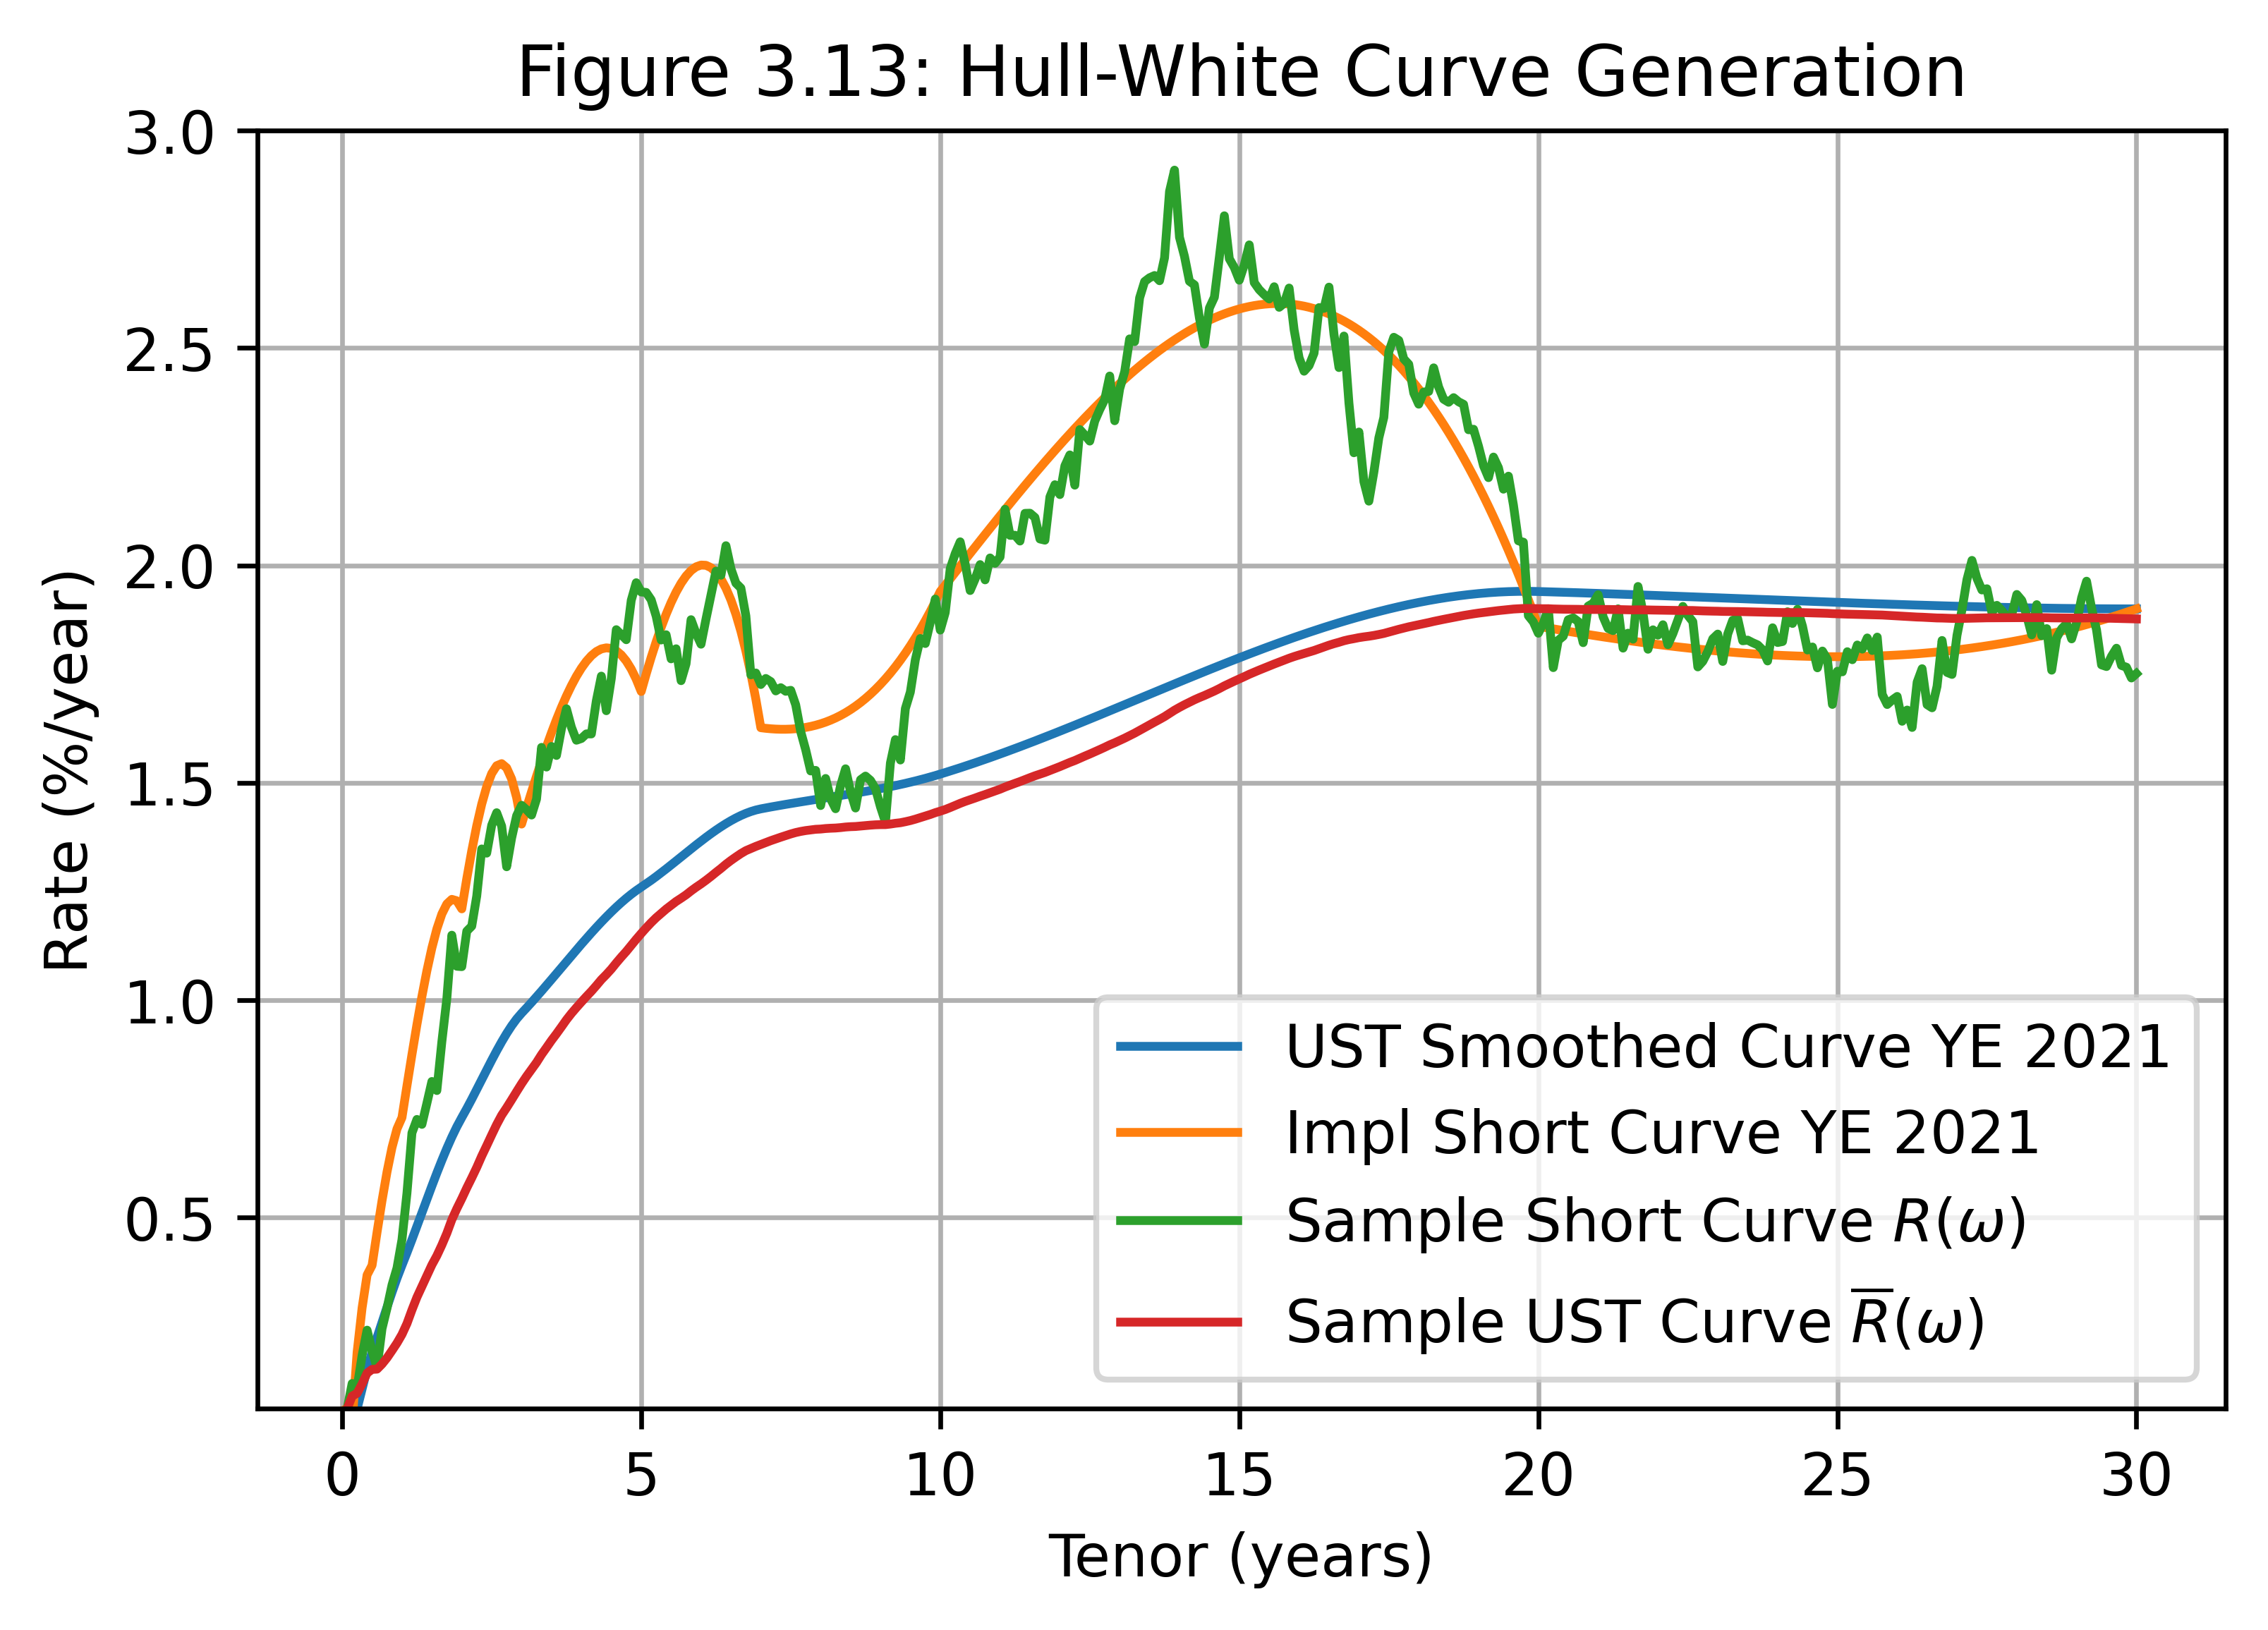

In [14]:
#Code Segment 3.13
import random
#Plot an observed year-end Treasury curve;
#a short-rate curve based on that;
#a Hull-White randomly generated short-rate curve;
#and a yield curve integrating the Hull-White short curve

def hull_white_path(xlam,sig,shortrs,tens,fixedseed):
    #Generates one Hull-White path using parameters
    #xlam (lambda) and sig (sigma) in 3.31
    #shortrs is time-varying r-infinity; tens are associated tenors
    #returns randomwalk (the path) and curvesample (the averaged cumulative path)
    randomwalk=[]
    curvesample=[]
    #Do we want the same omega every time?
    if fixedseed:
        random.seed(5772157)
    for i,rate in enumerate(shortrs):
        if i==0: # initialize
            randomwalk.append(shortrs[i])
            curvesample.append(randomwalk[i])
        else:
            delta_t=tens[i]-tens[i-1]
            deterministic=(xlambda*(shortrs[i]-randomwalk[i-1]))*delta_t
            stochastic=sigma*np.sqrt(delta_t)*random.gauss(0,1)
            randomwalk.append(randomwalk[i-1]+deterministic+stochastic)
            #sample curve is average of short rate
            #random walk to this point
            curvesample.append((curvesample[i-1]*i+randomwalk[i])/(i+1))
    return(randomwalk,curvesample)
#Done with hull_white_path

#Use short rate curve (tenors, shortrates) obtained in previous code segment

#set parameters for Ornstein-Uhlenbeck process
#xlambda is spring stiffness; sigma is volatility
xlambda=1
sigma=.05*np.sqrt(12)
randomwalk,curvesample=hull_white_path(xlambda,sigma,shortrates,tenors,True)

#Plot the four curves      
minrate=min(curvesample)
maxrate=max(curvesample)
plt.ylim(min(.5,minrate),max(3,maxrate))
plt.plot(tenors, curvemonthly, label='UST Smoothed Curve YE '+lastday[:4])
plt.plot(tenors, shortrates, label='Impl Short Curve YE '+lastday[:4])
plt.plot(tenors, randomwalk, label='Sample Short Curve $R(\omega)$')
plt.plot(tenors, curvesample, label='Sample UST Curve $\overline{R}(\omega)$')
## Configure the graph
plt.title('Figure 3.13: Hull-White Curve Generation')
plt.xlabel('Tenor (years)')
plt.ylabel('Rate (%/year)')
plt.legend()
plt.grid(True)
plt.show;

## Code segment 3.14  
Figure 3.14 in Section 3.8.2

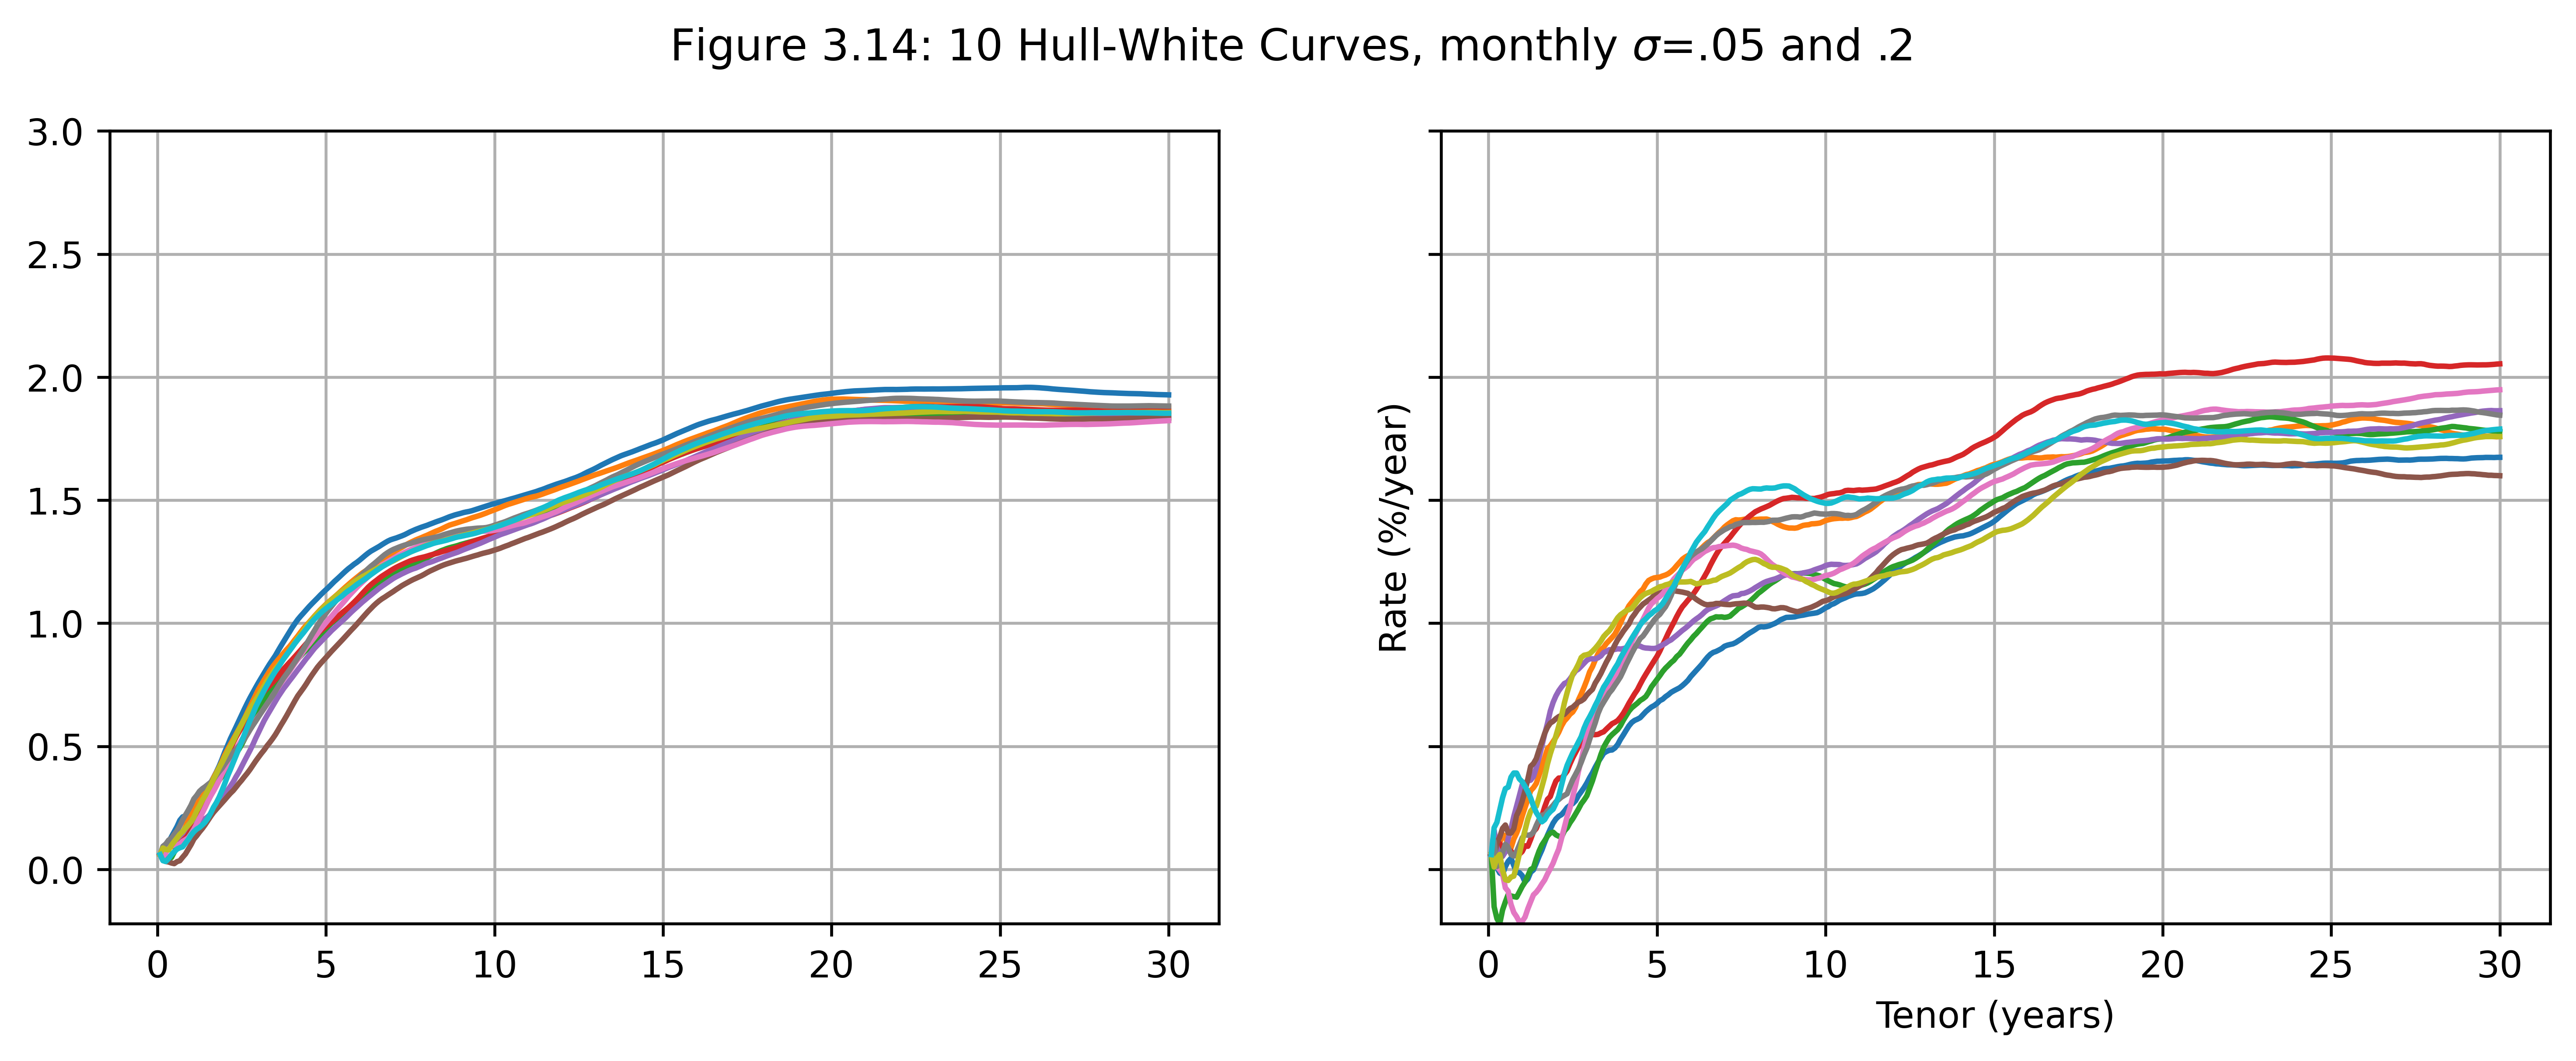

In [15]:
#Code Segment 3.14
#Plot 10 Hull-White paths based on yearend US Treasury curve

#do one graph with sigma=.05 and another with sigma=.2
#keep track of range
minrate,maxrate=1000,-1000
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)
fig.suptitle("Figure 3.14: 10 Hull-White Curves, monthly $\sigma$=.05 and .2")
plt.ylabel("Rate (%/year)")

#set parameter for Ornstein-Uhlenbeck process
xlambda=1
ax=ax1

for sigma in (.05*np.sqrt(12),.2*np.sqrt(12)):
    #generate and plot 10 sample curves
    for sample_number in range(10):
        randomwalk,curvesample=hull_white_path(xlambda,sigma,shortrates,tenors,False)
        minrate=min(curvesample+[minrate])
        maxrate=max(curvesample+[maxrate])
        ax.plot(tenors,curvesample)
    plt.xlabel('Tenor (years)')
    ax.grid(True)
    ax=ax2

plt.ylim(min(.5,minrate),max(3,maxrate))
plt.show;